# Customer Segmentation

## Understanding and playing with data

In [1]:
#importing necessary libraries
import pandas as pd
import datetime as dt
%matplotlib inline
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:

baskets_sample=pd.read_csv('baskets_sample.csv')
category_spends_sample=pd.read_csv('category_spends_sample.csv')
customers_sample=pd.read_csv('customers_sample.csv')
lineitems_sample=pd.read_csv('lineitems_sample.csv')

In [3]:
baskets_sample

customer_number        purchase_time  basket_quantity basket_spend  \
0                 11911  2007-03-01 07:06:00                7        £3.09   
1                  4047  2007-03-01 07:13:00                9        £7.99   
2                  3571  2007-03-01 07:27:00                9       £37.06   
3                  4079  2007-03-01 07:34:00               11       £11.91   
4                  6063  2007-03-01 07:36:00                3        £1.45   
...                 ...                  ...              ...          ...   
195542             5107  2007-08-31 21:40:00                6        £9.66   
195543             1988  2007-08-31 21:45:00               12       £14.98   
195544             3028  2007-08-31 21:46:00                6        £6.21   
195545             7191  2007-08-31 21:46:00                7        £6.30   
195546            10107  2007-08-31 21:55:00               12        £8.03   

        basket_categories  
0                       3  
1                       5  
2                       6  
3                       5  
4                       1  
...                   ...  
195542                  3  
195543                  6  
195544                  2  
195545                  3  
195546                  6  

[195547 rows x 5 columns]

In [4]:
lineitems_sample

customer_number        purchase_time  product_id  \
0                  14577  2007-03-10 11:58:00      722653   
1                   7210  2007-03-22 10:53:00      696136   
2                   3145  2007-03-26 11:17:00      139543   
3                   2649  2007-03-12 16:05:00       34890   
4                    859  2007-03-10 09:53:00      613984   
...                  ...                  ...         ...   
1461310            11585  2007-08-21 11:59:00      730790   
1461311             7329  2007-08-30 19:34:00      730790   
1461312             1129  2007-08-30 16:51:00      730798   
1461313             5060  2007-08-11 16:30:00      730798   
1461314             5703  2007-08-28 17:15:00      730798   

                    category  quantity   spend  
0               GROCERY_FOOD         1   £1.39  
1        GROCERY_HEALTH_PETS         1   £4.25  
2        GROCERY_HEALTH_PETS         1   £0.50  
3                     BAKERY         1   £0.57  
4                     BAKERY         1   £1.59  
...                      ...       ...     ...  
1461310      PRACTICAL_ITEMS         1   £3.40  
1461311      PRACTICAL_ITEMS         1   £3.40  
1461312      PRACTICAL_ITEMS         3  £10.19  
1461313      PRACTICAL_ITEMS         2   £6.79  
1461314      PRACTICAL_ITEMS         2   £6.79  

[1461315 rows x 6 columns]

In [5]:
lineitems_sample.loc[lineitems_sample['customer_number'] == 14577]

customer_number        purchase_time  product_id      category  \
0                  14577  2007-03-10 11:58:00      722653  GROCERY_FOOD   
4279               14577  2007-03-24 11:49:00       40248         DAIRY   
4280               14577  2007-03-17 12:08:00       40248         DAIRY   
4281               14577  2007-03-10 11:58:00       40248         DAIRY   
4282               14577  2007-03-03 12:09:00       40248         DAIRY   
...                  ...                  ...         ...           ...   
1436599            14577  2007-08-20 14:14:00      613699   WORLD_FOODS   
1436600            14577  2007-08-04 11:47:00      613699   WORLD_FOODS   
1436601            14577  2007-08-18 11:48:00      613699   WORLD_FOODS   
1436602            14577  2007-08-06 14:36:00      613699   WORLD_FOODS   
1436603            14577  2007-08-07 12:45:00      613699   WORLD_FOODS   

         quantity  spend  
0               1  £1.39  
4279            1  £0.68  
4280            1  £0.68  
4281            1  £0.68  
4282            1  £0.66  
...           ...    ...  
1436599         1  £0.28  
1436600         2  £0.56  
1436601         2  £0.56  
1436602         2  £0.56  
1436603         2  £0.56  

[533 rows x 6 columns]

In [6]:
lineitems_sample.loc[lineitems_sample['category'] == 'DISCOUNT_BAKERY']

customer_number        purchase_time  product_id         category  \
4152               12557  2007-03-28 10:05:00      581571  DISCOUNT_BAKERY   
4153               12557  2007-03-21 09:48:00      581571  DISCOUNT_BAKERY   
4154               12557  2007-03-14 10:18:00      581571  DISCOUNT_BAKERY   
4155               12557  2007-03-07 10:11:00      581571  DISCOUNT_BAKERY   
5453                7067  2007-03-26 12:21:00      140464  DISCOUNT_BAKERY   
...                  ...                  ...         ...              ...   
1460279            12055  2007-08-02 12:08:00      581582  DISCOUNT_BAKERY   
1460280            10869  2007-08-15 08:46:00      581582  DISCOUNT_BAKERY   
1460281              117  2007-08-31 13:59:00      581582  DISCOUNT_BAKERY   
1460282            11954  2007-08-11 10:05:00      581588  DISCOUNT_BAKERY   
1460283             5510  2007-08-29 12:46:00      581588  DISCOUNT_BAKERY   

         quantity  spend  
4152            2  £2.38  
4153            2  £2.38  
4154            2  £2.38  
4155            2  £2.38  
5453            2  £2.29  
...           ...    ...  
1460279         1  £2.69  
1460280         1  £0.89  
1460281         2  £3.38  
1460282         4  £1.68  
1460283         1  £1.69  

[3771 rows x 6 columns]

Checking for spending amount for a particular customer number 

In [7]:
baskets_sample.loc[(baskets_sample['customer_number'] == 14577) & (baskets_sample['purchase_time'] == '2007-03-03 12:09:00')]

customer_number        purchase_time  basket_quantity basket_spend  \
2921            14577  2007-03-03 12:09:00                8        £6.96   

      basket_categories  
2921                  5

In [8]:
lineitems_sample.loc[(lineitems_sample['customer_number'] == 14577) & (lineitems_sample['purchase_time'] == '2007-03-03 12:09:00')]

customer_number        purchase_time  product_id       category  \
4282              14577  2007-03-03 12:09:00       40248          DAIRY   
4305              14577  2007-03-03 12:09:00      715188  CONFECTIONARY   
4306              14577  2007-03-03 12:09:00      715231  CONFECTIONARY   
4352              14577  2007-03-03 12:09:00      175668         FROZEN   
4423              14577  2007-03-03 12:09:00      724577    WORLD_FOODS   
482538            14577  2007-03-03 12:09:00        4798      FRUIT_VEG   

        quantity  spend  
4282           1  £0.66  
4305           1  £0.98  
4306           1  £0.98  
4352           1  £1.78  
4423           2  £0.56  
482538         2  £2.00

## Data preprocessing 

In [9]:
# Data cleaning anf checking total spend in different tables for consistency
baskets_sample['basket_spend'] = baskets_sample['basket_spend'].str.replace("£", "")
baskets_sample['basket_spend'] = pd.to_numeric (baskets_sample['basket_spend'].str.replace(",", ""))
print(baskets_sample["basket_spend"].sum())

2308238.8099999996


In [10]:

lineitems_sample["spend"] = lineitems_sample["spend"].str.replace("£", "")
lineitems_sample['spend'] = pd.to_numeric (lineitems_sample['spend'].str.replace(",", ""))
print(lineitems_sample['spend'].sum())

2308238.809999999


Both have same values so anything can be used for rfm


In [11]:
lineitems_sample.isnull().sum(axis=0)

customer_number    0
purchase_time      0
product_id         0
category           0
quantity           0
spend              0
dtype: int64

In [12]:
lineitems_sample.spend.min()

-100.0

Checking for negative values and handling them

Returned items

In [13]:
lineitems_sample[lineitems_sample['spend'] < 0] 

customer_number        purchase_time  product_id category  quantity  \
1659                6922  2007-03-29 11:16:00      106149  LOTTERY        -1   
4733               10591  2007-03-05 17:57:00      106149  LOTTERY        -1   
7020               16184  2007-03-19 20:19:00      106149  LOTTERY        -1   
12134               6668  2007-03-22 14:27:00      106149  LOTTERY        -1   
12370               1707  2007-03-06 16:10:00      106149  LOTTERY        -1   
...                  ...                  ...         ...      ...       ...   
1447648             9521  2007-08-18 17:10:00      106149  LOTTERY        -1   
1447649            14060  2007-08-04 16:00:00      106149  LOTTERY        -1   
1447650            14060  2007-08-22 18:33:00      106149  LOTTERY        -1   
1447651             6483  2007-08-11 15:45:00      106149  LOTTERY        -1   
1447652            11737  2007-08-25 08:48:00      106149  LOTTERY        -1   

         spend  
1659     -10.0  
4733      -1.0  
7020      -1.0  
12134     -1.0  
12370    -10.0  
...        ...  
1447648   -6.0  
1447649  -10.0  
1447650  -10.0  
1447651  -10.0  
1447652   -2.0  

[864 rows x 6 columns]

In [14]:
lineitems_sample[(lineitems_sample['spend'] < 0) & (lineitems_sample['category'] != 'LOTTERY')] 

customer_number        purchase_time  product_id             category  \
71528             12650  2007-03-28 15:03:00      104074  GROCERY_HEALTH_PETS   
114822            14891  2007-03-03 13:20:00      633312  GROCERY_HEALTH_PETS   
159279             7955  2007-03-04 15:19:00      687882  GROCERY_HEALTH_PETS   
300017            15972  2007-04-20 12:36:00      155613          SOFT_DRINKS   
300018            15972  2007-04-06 10:58:00      155613          SOFT_DRINKS   
332072             6834  2007-04-26 15:13:00       31643               DRINKS   
351889             7955  2007-04-03 16:11:00       28795        CONFECTIONARY   
387460            13031  2007-04-07 12:17:00      643451        CONFECTIONARY   
398722            15972  2007-05-26 13:35:00      155613          SOFT_DRINKS   
398723             8371  2007-05-09 10:49:00      155613          SOFT_DRINKS   
420965            15972  2007-06-22 13:35:00      155613          SOFT_DRINKS   
420966            15972  2007-06-08 12:12:00      155613          SOFT_DRINKS   
420967            15972  2007-06-15 11:34:00      155613          SOFT_DRINKS   
420968            15972  2007-06-01 12:08:00      155613          SOFT_DRINKS   
443057            15972  2007-07-06 13:18:00      155613          SOFT_DRINKS   
443058            15972  2007-07-27 11:48:00      155613          SOFT_DRINKS   
443059            15972  2007-07-20 12:09:00      155613          SOFT_DRINKS   
449655            10438  2007-07-03 19:06:00      651266                 DELI   
463734             7955  2007-08-27 16:19:00      104090                 MEAT   
464662            15972  2007-08-01 11:32:00      155613          SOFT_DRINKS   
464663             9703  2007-08-09 10:06:00      155613          SOFT_DRINKS   
464664             9703  2007-08-06 08:39:00      155613          SOFT_DRINKS   

        quantity  spend  
71528         -1  -1.96  
114822        -1  -2.63  
159279        -1  -6.19  
300017       -12  -2.04  
300018        -4  -0.68  
332072        -1  -3.82  
351889        -1  -1.01  
387460        -4 -34.01  
398722        -7  -1.19  
398723        -1  -0.17  
420965       -12  -2.04  
420966       -13  -2.21  
420967       -12  -2.04  
420968        -6  -1.02  
443057       -10  -1.70  
443058        -6  -1.02  
443059        -7  -1.19  
449655        -1  -2.49  
463734        -1  -1.00  
464662        -8  -1.36  
464663        -3  -0.51  
464664        -3  -0.51

In [15]:
lineitems_sample.drop(lineitems_sample[lineitems_sample['quantity'] <= 0].index, inplace = True)

Creating total spends per customer number for analysis

In [16]:
lineitems_sample['Total Price']=lineitems_sample['quantity']*lineitems_sample['spend']
lineitems_sample

customer_number        purchase_time  product_id  \
0                  14577  2007-03-10 11:58:00      722653   
1                   7210  2007-03-22 10:53:00      696136   
2                   3145  2007-03-26 11:17:00      139543   
3                   2649  2007-03-12 16:05:00       34890   
4                    859  2007-03-10 09:53:00      613984   
...                  ...                  ...         ...   
1461310            11585  2007-08-21 11:59:00      730790   
1461311             7329  2007-08-30 19:34:00      730790   
1461312             1129  2007-08-30 16:51:00      730798   
1461313             5060  2007-08-11 16:30:00      730798   
1461314             5703  2007-08-28 17:15:00      730798   

                    category  quantity  spend  Total Price  
0               GROCERY_FOOD         1   1.39         1.39  
1        GROCERY_HEALTH_PETS         1   4.25         4.25  
2        GROCERY_HEALTH_PETS         1   0.50         0.50  
3                     BAKERY         1   0.57         0.57  
4                     BAKERY         1   1.59         1.59  
...                      ...       ...    ...          ...  
1461310      PRACTICAL_ITEMS         1   3.40         3.40  
1461311      PRACTICAL_ITEMS         1   3.40         3.40  
1461312      PRACTICAL_ITEMS         3  10.19        30.57  
1461313      PRACTICAL_ITEMS         2   6.79        13.58  
1461314      PRACTICAL_ITEMS         2   6.79        13.58  

[1460451 rows x 7 columns]

In [17]:
lineitems_sample.purchase_time.max()


'2007-08-31 21:55:00'

In [18]:
maxidate = dt.datetime(2007,9,1) 

In [19]:
lineitems_sample['purchase_time']=pd.to_datetime(lineitems_sample['purchase_time']) # date time conversion

In [20]:
lineitems_sample['freq_time'] = lineitems_sample.loc[:, 'purchase_time']

Removing duplicated values

In [21]:
duplicateRows = lineitems_sample[lineitems_sample.duplicated()]
duplicateRows

customer_number       purchase_time  product_id          category  \
38242               3028 2007-03-26 09:37:00      691085         CASHPOINT   
52170               4300 2007-03-09 17:04:00       40243             DAIRY   
62032               2988 2007-03-30 13:19:00      722356     CONFECTIONARY   
90578               9902 2007-03-25 18:03:00       40243             DAIRY   
114177              7126 2007-03-03 14:43:00      712999         CASHPOINT   
...                  ...                 ...         ...               ...   
1444762             6453 2007-06-29 07:15:00      736562           LOTTERY   
1446518             4691 2007-07-07 09:44:00      726487           LOTTERY   
1455865            11379 2007-08-29 20:34:00      690145         CASHPOINT   
1456980             2986 2007-06-17 11:41:00       90923  SEASONAL_GIFTING   
1459474            10885 2007-07-31 15:34:00      140464   DISCOUNT_BAKERY   

         quantity  spend  Total Price           freq_time  
38242           1   5.00         5.00 2007-03-26 09:37:00  
52170           1   0.68         0.68 2007-03-09 17:04:00  
62032           1   0.99         0.99 2007-03-30 13:19:00  
90578           1   0.71         0.71 2007-03-25 18:03:00  
114177          1   5.00         5.00 2007-03-03 14:43:00  
...           ...    ...          ...                 ...  
1444762         1   1.00         1.00 2007-06-29 07:15:00  
1446518         1   1.00         1.00 2007-07-07 09:44:00  
1455865         1   5.00         5.00 2007-08-29 20:34:00  
1456980         1   1.27         1.27 2007-06-17 11:41:00  
1459474         1   0.63         0.63 2007-07-31 15:34:00  

[114 rows x 8 columns]

In [22]:
lineitems_sample.drop_duplicates(inplace=True)

In [23]:
lineitems_sample

customer_number       purchase_time  product_id             category  \
0                  14577 2007-03-10 11:58:00      722653         GROCERY_FOOD   
1                   7210 2007-03-22 10:53:00      696136  GROCERY_HEALTH_PETS   
2                   3145 2007-03-26 11:17:00      139543  GROCERY_HEALTH_PETS   
3                   2649 2007-03-12 16:05:00       34890               BAKERY   
4                    859 2007-03-10 09:53:00      613984               BAKERY   
...                  ...                 ...         ...                  ...   
1461310            11585 2007-08-21 11:59:00      730790      PRACTICAL_ITEMS   
1461311             7329 2007-08-30 19:34:00      730790      PRACTICAL_ITEMS   
1461312             1129 2007-08-30 16:51:00      730798      PRACTICAL_ITEMS   
1461313             5060 2007-08-11 16:30:00      730798      PRACTICAL_ITEMS   
1461314             5703 2007-08-28 17:15:00      730798      PRACTICAL_ITEMS   

         quantity  spend  Total Price           freq_time  
0               1   1.39         1.39 2007-03-10 11:58:00  
1               1   4.25         4.25 2007-03-22 10:53:00  
2               1   0.50         0.50 2007-03-26 11:17:00  
3               1   0.57         0.57 2007-03-12 16:05:00  
4               1   1.59         1.59 2007-03-10 09:53:00  
...           ...    ...          ...                 ...  
1461310         1   3.40         3.40 2007-08-21 11:59:00  
1461311         1   3.40         3.40 2007-08-30 19:34:00  
1461312         3  10.19        30.57 2007-08-30 16:51:00  
1461313         2   6.79        13.58 2007-08-11 16:30:00  
1461314         2   6.79        13.58 2007-08-28 17:15:00  

[1460337 rows x 8 columns]

In [24]:
for column in category_spends_sample.columns:
  category_spends_sample[column] = category_spends_sample[column].replace({'\£': '', ',': ''}, regex=True)

for column in category_spends_sample.columns:
    if category_spends_sample[column].dtype == 'object':
        category_spends_sample[column] = category_spends_sample[column].astype(np.float64)
        




In [25]:
category_spends_sample.describe()

customer_number    fruit_veg        dairy  confectionary  grocery_food  \
count      3000.000000  3000.000000  3000.000000    3000.000000   3000.000000   
mean       8095.724333    69.456163    71.302683      57.347793     60.007530   
std        4686.259488    70.499654    57.966265      55.959350     57.682533   
min          14.000000     0.000000     0.000000       0.000000      0.000000   
25%        4044.750000    22.695000    31.390000      21.070000     21.087500   
50%        8218.500000    50.935000    56.875000      42.290000     44.030000   
75%       12115.500000    93.405000    95.327500      75.125000     80.922500   
max       16316.000000  1262.970000   708.040000     614.370000   1017.070000   

       grocery_health_pets  bakery  newspapers_magazines  prepared_meals  \
count          3000.000000  3000.0           3000.000000      3000.00000   
mean             60.909867     0.0             16.653390        35.48057   
std              69.805023     0.0             26.377091        41.24047   
min               0.000000     0.0              0.000000         0.00000   
25%              18.145000     0.0              1.500000         8.70000   
50%              39.075000     0.0              7.345000        23.09500   
75%              77.250000     0.0             19.687500        47.33000   
max             884.450000     0.0            351.730000       454.29000   

       soft_drinks  ...         meat      tobacco       drinks         deli  \
count  3000.000000  ...  3000.000000  3000.000000  3000.000000  3000.000000   
mean     23.303350  ...    54.740687    92.547613    62.242217    13.736440   
std      35.695592  ...    67.802126   201.703812   121.500365    25.486136   
min       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
25%       3.750000  ...    12.640000     0.000000     0.000000     0.000000   
50%      11.685000  ...    32.930000     2.030000    12.830000     3.495000   
75%      28.782500  ...    72.380000    81.030000    65.150000    15.770000   
max     529.650000  ...   713.280000  2488.940000  1005.330000   316.190000   

       world_foods      lottery    cashpoint  seasonal_gifting  \
count  3000.000000  3000.000000  3000.000000       3000.000000   
mean      8.554260    14.165603    45.330583          6.126987   
std      14.757745    48.469754   123.584361         13.104271   
min       0.000000   -74.000000     0.000000          0.000000   
25%       0.890000     0.000000     0.000000          0.000000   
50%       3.760000     0.000000     0.000000          1.990000   
75%      10.647500     6.000000    30.000000          6.720000   
max     321.490000   946.000000  2137.010000        229.440000   

       discount_bakery  practical_items  
count      3000.000000      3000.000000  
mean          1.814837         2.016220  
std           9.450367         4.322232  
min           0.000000         0.000000  
25%           0.000000         0.000000  
50%           0.000000         0.000000  
75%           0.000000         2.510000  
max         173.060000        65.060000  

[8 rows x 21 columns]

<AxesSubplot:>

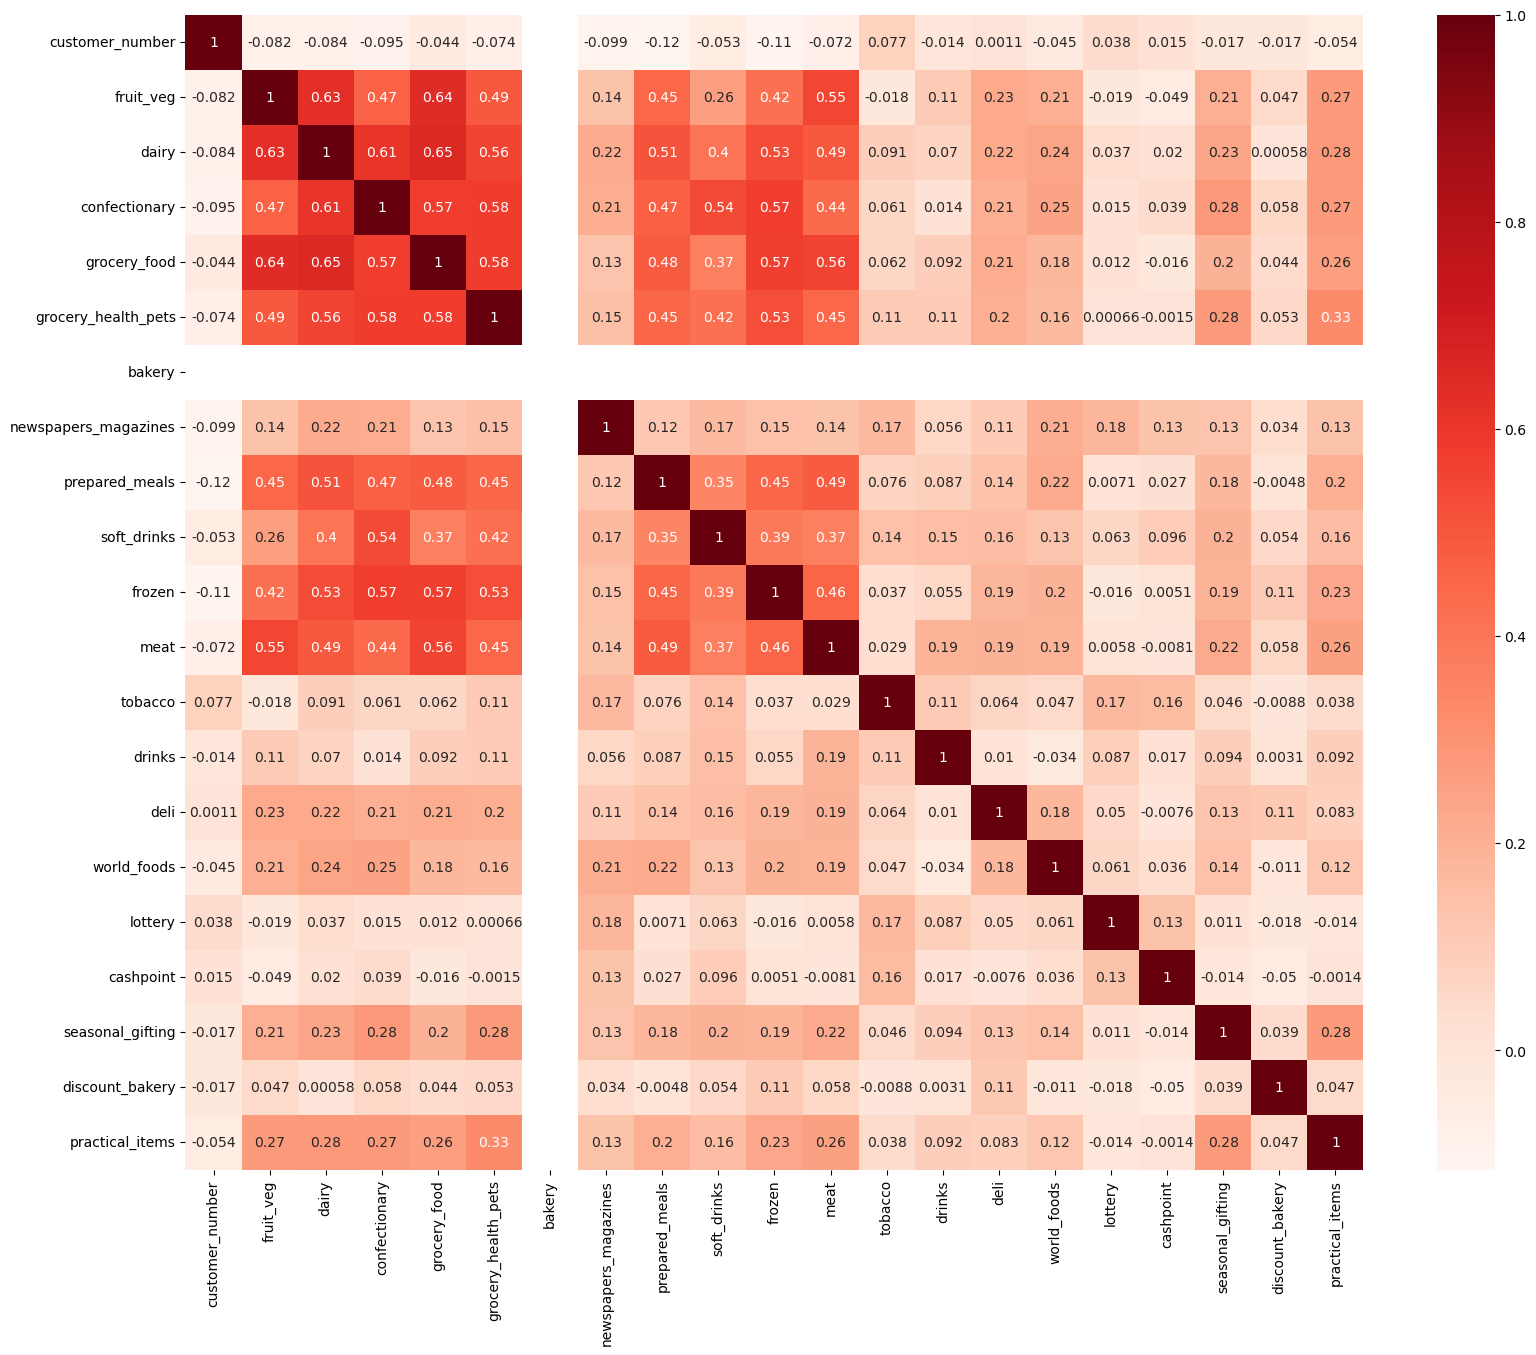

In [26]:
import seaborn as sns
plt.figure(figsize=(19, 15))
corr = category_spends_sample.corr()
sns.heatmap(corr,annot=True,cmap='Reds')

category
TOBACCO                 277573.11
DAIRY                   213879.97
FRUIT_VEG               208351.91
DRINKS                  186718.57
GROCERY_HEALTH_PETS     182730.88
GROCERY_FOOD            180018.66
CONFECTIONARY           172072.74
MEAT                    164219.00
CASHPOINT               135976.75
BAKERY                  114624.69
PREPARED_MEALS          106438.41
FROZEN                  106395.60
SOFT_DRINKS              69922.49
NEWSPAPERS_MAGAZINES     49951.26
LOTTERY                  47528.26
DELI                     41209.71
WORLD_FOODS              25661.79
SEASONAL_GIFTING         18378.00
PRACTICAL_ITEMS           6048.66
DISCOUNT_BAKERY           5442.50
Name: spend, dtype: float64


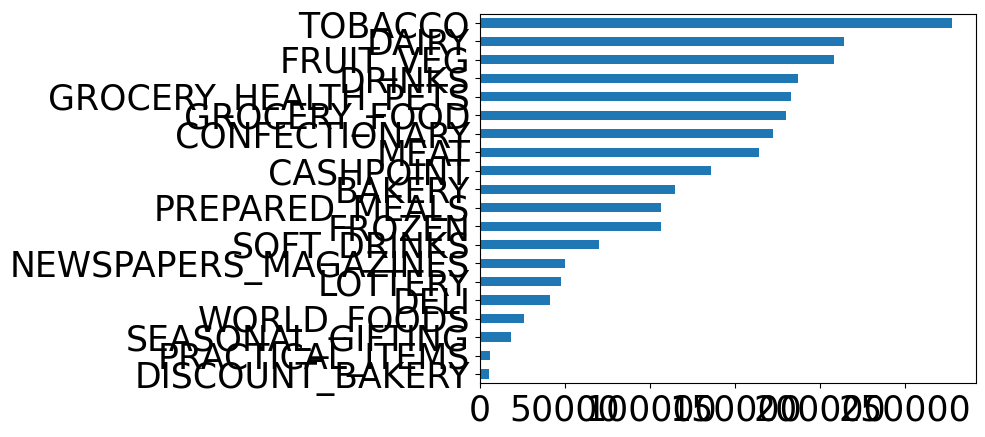

<Figure size 3000x3000 with 0 Axes>

In [27]:
revenue_per_cat = lineitems_sample.groupby("category")["spend"].sum()
# Total revenue per category in descending order

print (revenue_per_cat.sort_values (ascending = False))

# Plot
x = revenue_per_cat.sort_values (ascending = True)
x.plot (kind = "barh", xlabel = "", ylabel = "Revenue", fontsize='25')
plt.figure(figsize=(30, 30))
plt.show()

Inconsistencies and NA values found in Category spends table, Thus new table will have to be formed providing same details with accurate and consistent values. Feature engineering will be performed on lineitems to get the accurate and consistent table

## Feature Engineering

Converting data to get Recency, Frequency and monetary values

In [28]:
rfmTable=lineitems_sample.groupby('customer_number').agg({'purchase_time':lambda x:(maxidate-x.max()).days,'freq_time':lambda x:len(x.unique()),'Total Price':lambda x: x.sum()})
rfmTable

purchase_time  freq_time  Total Price
customer_number                                       
14                           1         56      1084.84
45                           1         33       726.56
52                           2         59       303.76
61                           3         37       667.72
63                           7         48       312.66
...                        ...        ...          ...
16295                        0         54       809.22
16301                        4         42       314.28
16303                       11         56       397.53
16306                       10         29       494.78
16316                        0         17       413.14

[3000 rows x 3 columns]

In [29]:
rfmTable.rename(columns={'purchase_time':'Recency','freq_time':'Frequency','Total Price':'Monetary'},inplace=True)
rfmTable.head()

Recency  Frequency  Monetary
customer_number                              
14                     1         56   1084.84
45                     1         33    726.56
52                     2         59    303.76
61                     3         37    667.72
63                     7         48    312.66

In [30]:
rfmTable.dtypes

Recency        int64
Frequency      int64
Monetary     float64
dtype: object

In [31]:
rfmTable.describe()

Recency    Frequency      Monetary
count  3000.000000  3000.000000   3000.000000
mean      8.121333    65.178333   1059.388453
std      20.938531    47.463004    964.637625
min       0.000000     1.000000      7.280000
25%       0.000000    32.000000    511.035000
50%       2.000000    53.000000    810.260000
75%       6.000000    86.000000   1279.742500
max     164.000000   374.000000  19202.120000

In [32]:
rfmTable[rfmTable['Frequency'] == 374]

Recency  Frequency  Monetary
customer_number                              
11456                  0        374   2895.83

Checking the reason for high frequency (Multiple purchases are made my the same customer in a day regularly)

In [33]:
sorted(lineitems_sample[lineitems_sample['customer_number'] == 11456]['purchase_time'].unique())

[numpy.datetime64('2007-03-01T09:27:00.000000000'),
 numpy.datetime64('2007-03-01T13:42:00.000000000'),
 numpy.datetime64('2007-03-01T16:58:00.000000000'),
 numpy.datetime64('2007-03-02T09:48:00.000000000'),
 numpy.datetime64('2007-03-02T13:28:00.000000000'),
 numpy.datetime64('2007-03-03T09:27:00.000000000'),
 numpy.datetime64('2007-03-03T13:38:00.000000000'),
 numpy.datetime64('2007-03-04T10:27:00.000000000'),
 numpy.datetime64('2007-03-05T09:40:00.000000000'),
 numpy.datetime64('2007-03-05T13:56:00.000000000'),
 numpy.datetime64('2007-03-05T16:29:00.000000000'),
 numpy.datetime64('2007-03-06T09:53:00.000000000'),
 numpy.datetime64('2007-03-07T09:49:00.000000000'),
 numpy.datetime64('2007-03-08T09:47:00.000000000'),
 numpy.datetime64('2007-03-08T12:41:00.000000000'),
 numpy.datetime64('2007-03-08T15:19:00.000000000'),
 numpy.datetime64('2007-03-09T10:20:00.000000000'),
 numpy.datetime64('2007-03-09T13:36:00.000000000'),
 numpy.datetime64('2007-03-09T18:15:00.000000000'),
 numpy.datet

Visualizing data which wll be used for segmentation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


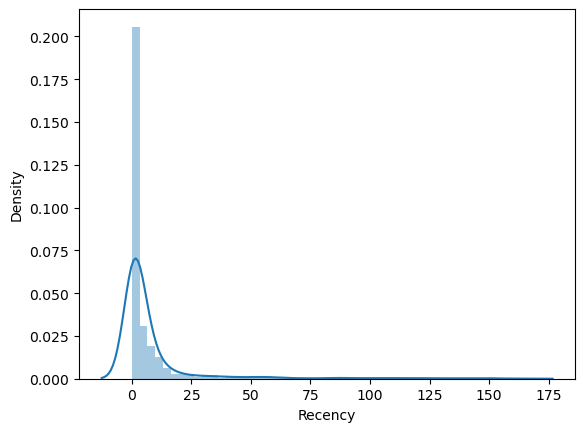

In [34]:
import seaborn as sns
x=rfmTable['Recency']
ax=sns.distplot(x)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


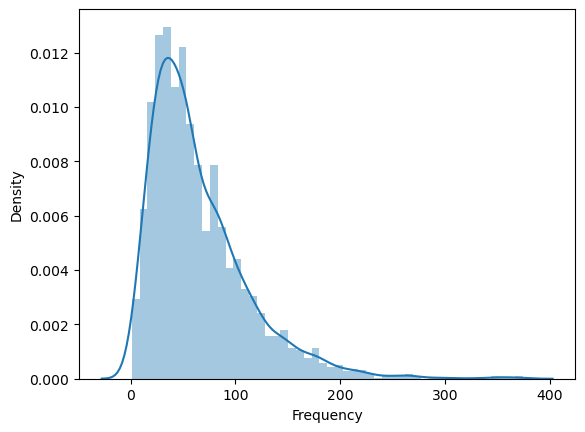

In [35]:
import seaborn as sns
x=rfmTable['Frequency']
ax=sns.distplot(x)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


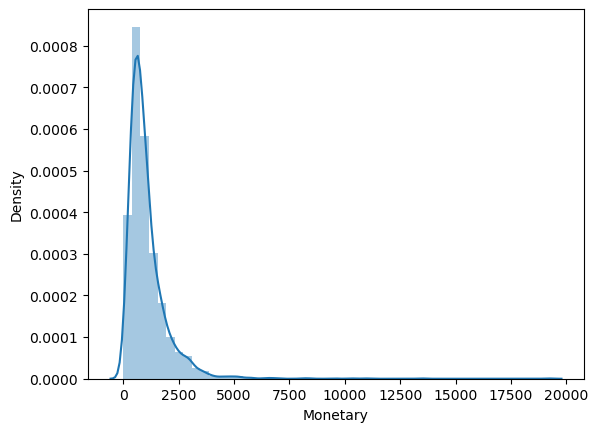

In [36]:
import seaborn as sns
x=rfmTable['Monetary']
ax=sns.distplot(x)

As part of feature engineering quantile cutting is performed on the RFM values to produce segments / archetypes

In [37]:
partition = rfmTable.quantile(q=[0.25,0.50,0.75])
partitionR = rfmTable.quantile(q=[0.50,0.75,0.85])
partition = partition.to_dict()
partitionR = partitionR.to_dict()
partition
#partitionR

{'Recency': {0.25: 0.0, 0.5: 2.0, 0.75: 6.0},
 'Frequency': {0.25: 32.0, 0.5: 53.0, 0.75: 86.0},
 'Monetary': {0.25: 511.035, 0.5: 810.26, 0.75: 1279.7425}}

In [38]:
def RScoreR(x,p,partition):
    if x<=partition[p][0.50]:
        return 1
    elif x<=partition[p][0.75]:
        return 2
    elif x<=partition[p][0.85]:
        return 3
    else:
        return 4
    
def RScore(x,p,partition):
    if x<=partition[p][0.25]:
        return 1
    elif x<=partition[p][0.50]:
        return 2
    elif x<=partition[p][0.75]:
        return 3
    else:
        return 4
    
def FMScore(x,p,partition):
    if x<=partition[p][0.25]:
        return 4
    elif x<=partition[p][0.50]:
        return 3
    elif x<=partition[p][0.75]:
        return 2
    else:
        return 1

In [39]:

rfmTable['R'] = rfmTable['Recency'].apply(RScore, args=('Recency',partition,))
rfmTable['F'] = rfmTable['Frequency'].apply(FMScore, args=('Frequency',partition,))
rfmTable['M'] = rfmTable['Monetary'].apply(FMScore, args=('Monetary',partition,))
rfmTable.head()

Recency  Frequency  Monetary  R  F  M
customer_number                                       
14                     1         56   1084.84  2  2  2
45                     1         33    726.56  2  3  3
52                     2         59    303.76  2  2  4
61                     3         37    667.72  3  3  3
63                     7         48    312.66  4  3  4

In [40]:
rfmTable['RFM'] = rfmTable.R.map(str) + rfmTable.F.map(str) + rfmTable.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfmTable['TotalRFM'] = rfmTable[['R', 'F', 'M']].sum(axis = 1)
rfmTable.head()

Recency  Frequency  Monetary  R  F  M  RFM  TotalRFM
customer_number                                                      
14                     1         56   1084.84  2  2  2  222         6
45                     1         33    726.56  2  3  3  233         8
52                     2         59    303.76  2  2  4  224         8
61                     3         37    667.72  3  3  3  333         9
63                     7         48    312.66  4  3  4  434        11

In [41]:
priority = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(rfmTable.TotalRFM, q = 4, labels = priority)
rfmTable['priority'] = Score_cuts.values
rfmTable.reset_index().head()

customer_number  Recency  Frequency  Monetary  R  F  M  RFM  TotalRFM  \
0               14        1         56   1084.84  2  2  2  222         6   
1               45        1         33    726.56  2  3  3  233         8   
2               52        2         59    303.76  2  2  4  224         8   
3               61        3         37    667.72  3  3  3  333         9   
4               63        7         48    312.66  4  3  4  434        11   

  priority  
0     Gold  
1   Silver  
2   Silver  
3   Silver  
4   Bronze

Checking the produced results systmeatically

In [42]:
rfmTable[rfmTable['priority']=='Platinum'].sort_values('TotalRFM', ascending=False)

Recency  Frequency  Monetary  R  F  M  RFM  TotalRFM  \
customer_number                                                         
7559                   2         90   1092.73  2  1  2  212         5   
5908                   2        125    972.81  2  1  2  212         5   
10320                  0         82    864.57  1  2  2  122         5   
5363                   3        155   1280.56  3  1  1  311         5   
5360                   0         38   1862.63  1  3  1  131         5   
...                  ...        ...       ... .. .. ..  ...       ...   
10570                  0         87   2215.71  1  1  1  111         3   
10549                  0        114   2002.01  1  1  1  111         3   
5185                   0        220   1320.02  1  1  1  111         3   
10537                  0        152   2369.57  1  1  1  111         3   
16292                  0        152   1578.02  1  1  1  111         3   

                 priority  
customer_number            
7559             Platinum  
5908             Platinum  
10320            Platinum  
5363             Platinum  
5360             Platinum  
...                   ...  
10570            Platinum  
10549            Platinum  
5185             Platinum  
10537            Platinum  
16292            Platinum  

[859 rows x 9 columns]

In [90]:
rfmTable.groupby("priority")["Monetary"].mean()

priority
Platinum    1768.703877
Gold        1089.551107
Silver       792.242171
Bronze       423.895896
Name: Monetary, dtype: float64

In [91]:
rfmTable.groupby("priority")["Frequency"].mean()

priority
Platinum    115.672875
Gold         64.943347
Silver       43.044910
Bronze       25.386555
Name: Frequency, dtype: float64

In [92]:
rfmTable.groupby("priority")["Recency"].mean()

priority
Platinum     0.459837
Gold         2.559947
Silver       6.261976
Bronze      24.990196
Name: Recency, dtype: float64

In [43]:
rfmTable.describe()

Recency    Frequency      Monetary            R            F  \
count  3000.000000  3000.000000   3000.000000  3000.000000  3000.000000   
mean      8.121333    65.178333   1059.388453     2.311667     2.518000   
std      20.938531    47.463004    964.637625     1.136205     1.125803   
min       0.000000     1.000000      7.280000     1.000000     1.000000   
25%       0.000000    32.000000    511.035000     1.000000     2.000000   
50%       2.000000    53.000000    810.260000     2.000000     3.000000   
75%       6.000000    86.000000   1279.742500     3.000000     4.000000   
max     164.000000   374.000000  19202.120000     4.000000     4.000000   

                M     TotalRFM  
count  3000.00000  3000.000000  
mean      2.50000     7.329667  
std       1.11822     2.654933  
min       1.00000     3.000000  
25%       1.75000     5.000000  
50%       2.50000     7.000000  
75%       3.25000     9.000000  
max       4.00000    12.000000

In [44]:
!pip install chart_studio

Defaulting to user installation because normal site-packages is not writeable


Visualizing the priority segments

In [45]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
graph = rfmTable.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("priority == 'Bronze'")['Recency'],
        y=graph.query("priority == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("priority == 'Silver'")['Recency'],
        y=graph.query("priority == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("priority == 'Gold'")['Recency'],
        y=graph.query("priority == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("priority == 'Platinum'")['Recency'],
        y=graph.query("priority == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary
graph = rfmTable.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("priority == 'Bronze'")['Frequency'],
        y=graph.query("priority == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("priority == 'Silver'")['Frequency'],
        y=graph.query("priority == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("priority == 'Gold'")['Frequency'],
        y=graph.query("priority == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("priority == 'Platinum'")['Frequency'],
        y=graph.query("priority == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary
graph = rfmTable.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("priority == 'Bronze'")['Recency'],
        y=graph.query("priority == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("priority == 'Silver'")['Recency'],
        y=graph.query("priority == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("priority == 'Gold'")['Recency'],
        y=graph.query("priority == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("priority == 'Platinum'")['Recency'],
        y=graph.query("priority == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [46]:
category_spends_sample.describe()

customer_number    fruit_veg        dairy  confectionary  grocery_food  \
count      3000.000000  3000.000000  3000.000000    3000.000000   3000.000000   
mean       8095.724333    69.456163    71.302683      57.347793     60.007530   
std        4686.259488    70.499654    57.966265      55.959350     57.682533   
min          14.000000     0.000000     0.000000       0.000000      0.000000   
25%        4044.750000    22.695000    31.390000      21.070000     21.087500   
50%        8218.500000    50.935000    56.875000      42.290000     44.030000   
75%       12115.500000    93.405000    95.327500      75.125000     80.922500   
max       16316.000000  1262.970000   708.040000     614.370000   1017.070000   

       grocery_health_pets  bakery  newspapers_magazines  prepared_meals  \
count          3000.000000  3000.0           3000.000000      3000.00000   
mean             60.909867     0.0             16.653390        35.48057   
std              69.805023     0.0             26.377091        41.24047   
min               0.000000     0.0              0.000000         0.00000   
25%              18.145000     0.0              1.500000         8.70000   
50%              39.075000     0.0              7.345000        23.09500   
75%              77.250000     0.0             19.687500        47.33000   
max             884.450000     0.0            351.730000       454.29000   

       soft_drinks  ...         meat      tobacco       drinks         deli  \
count  3000.000000  ...  3000.000000  3000.000000  3000.000000  3000.000000   
mean     23.303350  ...    54.740687    92.547613    62.242217    13.736440   
std      35.695592  ...    67.802126   201.703812   121.500365    25.486136   
min       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
25%       3.750000  ...    12.640000     0.000000     0.000000     0.000000   
50%      11.685000  ...    32.930000     2.030000    12.830000     3.495000   
75%      28.782500  ...    72.380000    81.030000    65.150000    15.770000   
max     529.650000  ...   713.280000  2488.940000  1005.330000   316.190000   

       world_foods      lottery    cashpoint  seasonal_gifting  \
count  3000.000000  3000.000000  3000.000000       3000.000000   
mean      8.554260    14.165603    45.330583          6.126987   
std      14.757745    48.469754   123.584361         13.104271   
min       0.000000   -74.000000     0.000000          0.000000   
25%       0.890000     0.000000     0.000000          0.000000   
50%       3.760000     0.000000     0.000000          1.990000   
75%      10.647500     6.000000    30.000000          6.720000   
max     321.490000   946.000000  2137.010000        229.440000   

       discount_bakery  practical_items  
count      3000.000000      3000.000000  
mean          1.814837         2.016220  
std           9.450367         4.322232  
min           0.000000         0.000000  
25%           0.000000         0.000000  
50%           0.000000         0.000000  
75%           0.000000         2.510000  
max         173.060000        65.060000  

[8 rows x 21 columns]

To recreate categorical spend table importing SQL for easier manipulation

In [47]:
from pathlib import Path
Path('my_data10.db').touch()
import sqlite3
con = sqlite3.connect('my_data10.db')
cur = con.cursor()
sqlite3.sqlite_version

'3.39.3'

In [48]:
lineitems_sample.to_sql('lineitems_sample_db10', con,  index=False)

1460337

In [49]:
#!pip3 install sqlalchemy 
#!pip3 install sqlalchemy_schemadisplay
from sqlalchemy import MetaData
from sqlalchemy_schemadisplay import create_schema_graph
from sqlalchemy import  create_engine
import pandas 

engine = create_engine('sqlite:///my_data10.db') 
meta = MetaData(bind=engine)
engine.connect()
print(engine)

Engine(sqlite:///my_data10.db)


In [50]:
categorical_spend=category_spends_sample.loc[:, ['customer_number']].reset_index(drop=True)

In [51]:
#SQL query
categories_new=lineitems_sample.category.unique()
for cat in categories_new:
  categorical_spend=categorical_spend.merge(pd.read_sql_query("""select customer_number, SUM(spend) as {} from lineitems_sample_db10 where category like '{}' Group by customer_number""".format(cat,cat),con),how='left',on='customer_number')

In [52]:
categorical_spend.fillna(1, inplace=True) #filling all the NA values with 1 (not 0 as will undergo log transform)

In [53]:
category_spends_sample.sort_values(by=['customer_number'])

customer_number  fruit_veg   dairy  confectionary  grocery_food  \
427                14      11.10  172.58          23.22         56.05   
380                45      30.21  142.16         106.54         83.42   
1425               52      53.29    5.19           3.29          1.08   
154                61      70.18   55.29          46.39         56.18   
1210               63      22.01   42.11          73.07         13.54   
...               ...        ...     ...            ...           ...   
575             16295      10.04   38.55          36.71          3.50   
1572            16301      16.16   19.54          84.53         24.62   
1177            16303      34.32   32.87          10.55         99.30   
282             16306      69.18   34.85           3.27         53.63   
12              16316      42.58   28.96          35.96         16.56   

      grocery_health_pets  bakery  newspapers_magazines  prepared_meals  \
427                 11.28     0.0                  6.40           23.36   
380                 24.31     0.0                 17.49           56.51   
1425                12.11     0.0                  3.12            2.78   
154                 45.71     0.0                  5.55           12.12   
1210                25.08     0.0                  2.00           13.38   
...                   ...     ...                   ...             ...   
575                  8.94     0.0                  3.59            6.28   
1572                19.33     0.0                  7.30            2.57   
1177                20.29     0.0                  6.00            3.56   
282                 13.35     0.0                  0.55           20.10   
12                  33.55     0.0                  1.78            6.46   

      soft_drinks  ...    meat  tobacco  drinks   deli  world_foods  lottery  \
427          5.31  ...  182.37     0.00  113.45   0.00        20.90      0.0   
380         29.65  ...   60.31     0.00    0.00   2.00         8.08      0.0   
1425         8.98  ...    9.74     0.00    0.00  49.07        35.10      1.0   
154         14.87  ...  121.38     0.00   20.65  19.88        16.38      6.0   
1210         1.67  ...    3.46     0.00    0.00  32.14        14.00      3.0   
...           ...  ...     ...      ...     ...    ...          ...      ...   
575         20.98  ...    0.00   206.19   27.20   0.00         4.61      3.0   
1572        15.78  ...    0.00     0.00   12.72   3.88         2.11     10.0   
1177         7.79  ...    0.00     0.00    0.00  22.46        13.58     74.0   
282         11.97  ...    0.00     0.37  200.68   0.00         1.35      0.0   
12          24.48  ...    0.00     0.00   73.37  24.65         4.01      0.0   

      cashpoint  seasonal_gifting  discount_bakery  practical_items  
427         0.0              5.07             1.25             0.00  
380         0.0              0.00             0.00             0.00  
1425       10.0             23.20             0.00             0.00  
154         0.0              3.04             0.00             2.87  
1210        0.0              0.00             0.00             0.00  
...         ...               ...              ...              ...  
575       270.0              1.44             0.00             0.00  
1572        0.0              5.01             0.00             0.00  
1177        0.0              0.00             0.00             0.00  
282        20.0              0.00             0.00             0.00  
12          0.0              0.00             0.00             5.32  

[3000 rows x 21 columns]

In [54]:
categorical_spend.sort_values(by=['customer_number'])

customer_number  GROCERY_FOOD  GROCERY_HEALTH_PETS  BAKERY  \
427                14         56.05                11.28   18.09   
380                45         83.42                24.31   18.00   
1425               52          1.08                12.11    2.45   
154                61         56.18                45.71   32.75   
1210               63         13.54                25.08   33.35   
...               ...           ...                  ...     ...   
575             16295          3.50                 8.94   22.94   
1572            16301         24.62                19.33    6.15   
1177            16303         99.30                20.29   24.23   
282             16306         53.63                13.35   17.39   
12              16316         16.56                33.55   19.93   

      PREPARED_MEALS  FROZEN  SEASONAL_GIFTING  CONFECTIONARY  \
427            23.36   25.29              5.07          23.22   
380            56.51    7.05              1.00         106.54   
1425            2.78    1.78             23.20           3.29   
154            12.12   18.63              3.04          46.39   
1210           13.38   14.53              1.00          73.07   
...              ...     ...               ...            ...   
575             6.28   15.73              1.44          36.71   
1572            2.57   21.73              5.01          84.53   
1177            3.56    5.37              1.00          10.55   
282            20.10   16.12              1.00           3.27   
12              6.46   12.79              1.00          35.96   

      NEWSPAPERS_MAGAZINES  SOFT_DRINKS  ...  DRINKS   DELI  CASHPOINT  \
427                   6.40         5.31  ...  113.45   1.00        1.0   
380                  17.49        29.65  ...    1.00   2.00        1.0   
1425                  3.12         8.98  ...    1.00  49.07       10.0   
154                   5.55        14.87  ...   20.65  19.88        1.0   
1210                  2.00         1.67  ...    1.00  32.14        1.0   
...                    ...          ...  ...     ...    ...        ...   
575                   3.59        20.98  ...   27.20   1.00      270.0   
1572                  7.30        15.78  ...   12.72   3.88        1.0   
1177                  6.00         7.79  ...    1.00  22.46        1.0   
282                   0.55        11.97  ...  200.68   1.00       20.0   
12                    1.78        24.48  ...   73.37  24.65        1.0   

       DAIRY  TOBACCO  PRACTICAL_ITEMS  WORLD_FOODS  LOTTERY  FRUIT_VEG  \
427   172.58     1.00             1.00        20.90      1.0      11.10   
380   142.16     1.00             1.00         8.08      1.0      30.21   
1425    5.19     1.00             1.00        35.10      1.0      53.29   
154    55.29     1.00             2.87        16.38      6.0      70.18   
1210   42.11     1.00             1.00        14.00      3.0      22.01   
...      ...      ...              ...          ...      ...        ...   
575    38.55   206.19             1.00         4.61      3.0      10.04   
1572   19.54     1.00             1.00         2.11     10.0      16.16   
1177   32.87     1.00             1.00        13.58     84.0      34.32   
282    34.85     0.37             1.00         1.35      1.0      69.18   
12     28.96     1.00             5.32         4.01      1.0      42.58   

      DISCOUNT_BAKERY  
427              1.25  
380              1.00  
1425             1.00  
154              1.00  
1210             1.00  
...               ...  
575              1.00  
1572             1.00  
1177             1.00  
282              1.00  
12               1.00  

[3000 rows x 21 columns]

<AxesSubplot:>

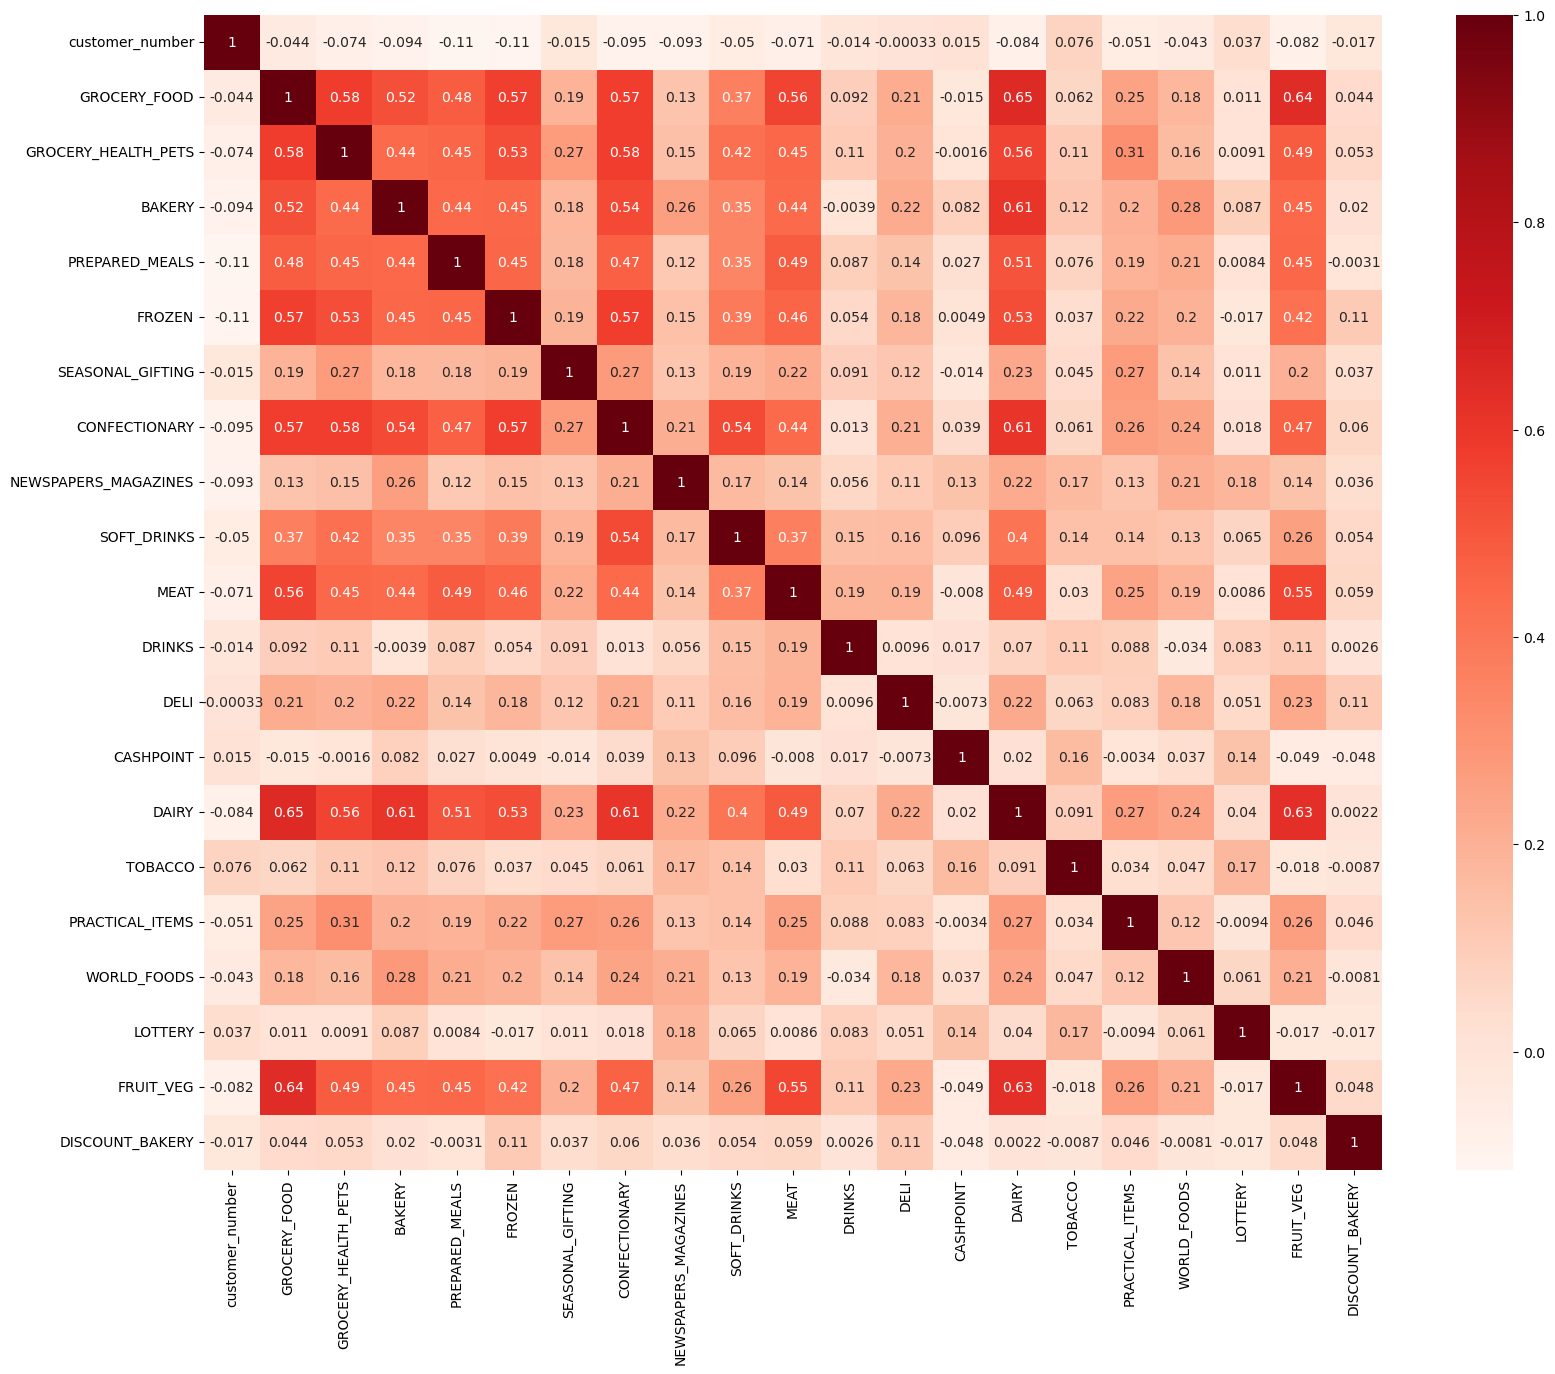

In [55]:
import seaborn as sns
plt.figure(figsize=(19, 15))
corr = categorical_spend.corr()
sns.heatmap(corr,annot=True,cmap='Reds') 
# better correlation graph with no NA values 

In [56]:
unlog_categorical=categorical_spend[['customer_number']] #extracted customer number to later join with logged table values

In [57]:
unlog_categorical

customer_number
0               11387
1                8171
2                1060
3                3728
4               14621
...               ...
2995            12541
2996            16081
2997             7094
2998             3457
2999             6647

[3000 rows x 1 columns]

In [58]:
categorical_spend

customer_number  GROCERY_FOOD  GROCERY_HEALTH_PETS  BAKERY  \
0               11387         27.08                29.59   26.58   
1                8171         33.43                66.40   20.02   
2                1060         20.57                37.04   75.72   
3                3728        119.84               111.08  111.67   
4               14621         29.03                37.17   33.13   
...               ...           ...                  ...     ...   
2995            12541        135.31                61.99   61.31   
2996            16081         23.69                16.12   17.51   
2997             7094         35.92                43.59   21.55   
2998             3457         10.10                12.51   19.34   
2999             6647         52.82                89.21   13.14   

      PREPARED_MEALS  FROZEN  SEASONAL_GIFTING  CONFECTIONARY  \
0               6.35   21.51              7.48         107.78   
1              12.09   78.74              9.99          28.84   
2              57.98   14.53            106.46          49.88   
3              25.54   15.24              1.00         175.50   
4               1.00    3.33              3.40          79.23   
...              ...     ...               ...            ...   
2995           61.02   95.22              1.00          89.36   
2996           15.96    0.99              1.00          18.32   
2997            1.78    2.89              1.00          42.31   
2998            1.04    8.19              1.98          21.96   
2999           37.50   18.89              1.00          40.78   

      NEWSPAPERS_MAGAZINES  SOFT_DRINKS  ...  DRINKS   DELI  CASHPOINT  \
0                    54.83        22.83  ...   28.02  28.12       15.0   
1                    22.06         2.34  ...    8.42   2.65        1.0   
2                     9.85        31.12  ...    1.00   2.60       20.0   
3                    13.05       124.42  ...    1.00   1.00        1.0   
4                    40.06         4.68  ...    2.55  99.16        1.0   
...                    ...          ...  ...     ...    ...        ...   
2995                  1.00        56.62  ...    1.00   1.00        1.0   
2996                  5.39         0.67  ...    1.00   7.73        1.0   
2997                 13.68        21.44  ...    7.65   4.10        1.0   
2998                  4.75         4.33  ...    1.00   8.27        1.0   
2999                  1.41        13.55  ...   17.01   1.80      235.0   

       DAIRY  TOBACCO  PRACTICAL_ITEMS  WORLD_FOODS  LOTTERY  FRUIT_VEG  \
0      35.91   162.10             0.84        28.54      2.0      64.58   
1      37.24     1.00             1.00         3.76      1.0      16.89   
2      82.98     1.00             1.00         1.00     18.0      87.30   
3     186.56   127.70             4.50         1.00      4.0      84.05   
4     121.31     1.00             1.00         1.00      1.0      35.16   
...      ...      ...              ...          ...      ...        ...   
2995   73.84    36.57             2.53         3.36      1.0      64.52   
2996   18.08    50.54             1.61         9.74     30.0       5.91   
2997  106.08     1.00             6.79         2.59      1.0     116.54   
2998   13.44     1.00             1.00         1.65      1.0       3.68   
2999   47.23   204.41             1.00         1.00      1.0      78.65   

      DISCOUNT_BAKERY  
0                 1.0  
1                 1.0  
2                 1.0  
3                 1.0  
4                 1.0  
...               ...  
2995              1.0  
2996              1.0  
2997              1.0  
2998              1.0  
2999              1.0  

[3000 rows x 21 columns]

Using log transformation to remove the right skew in the data and normalise the data (part of feature engineering)

In [59]:
logged_data = categorical_spend.iloc[:,1:].apply(np.log, axis = 1).round(3) 

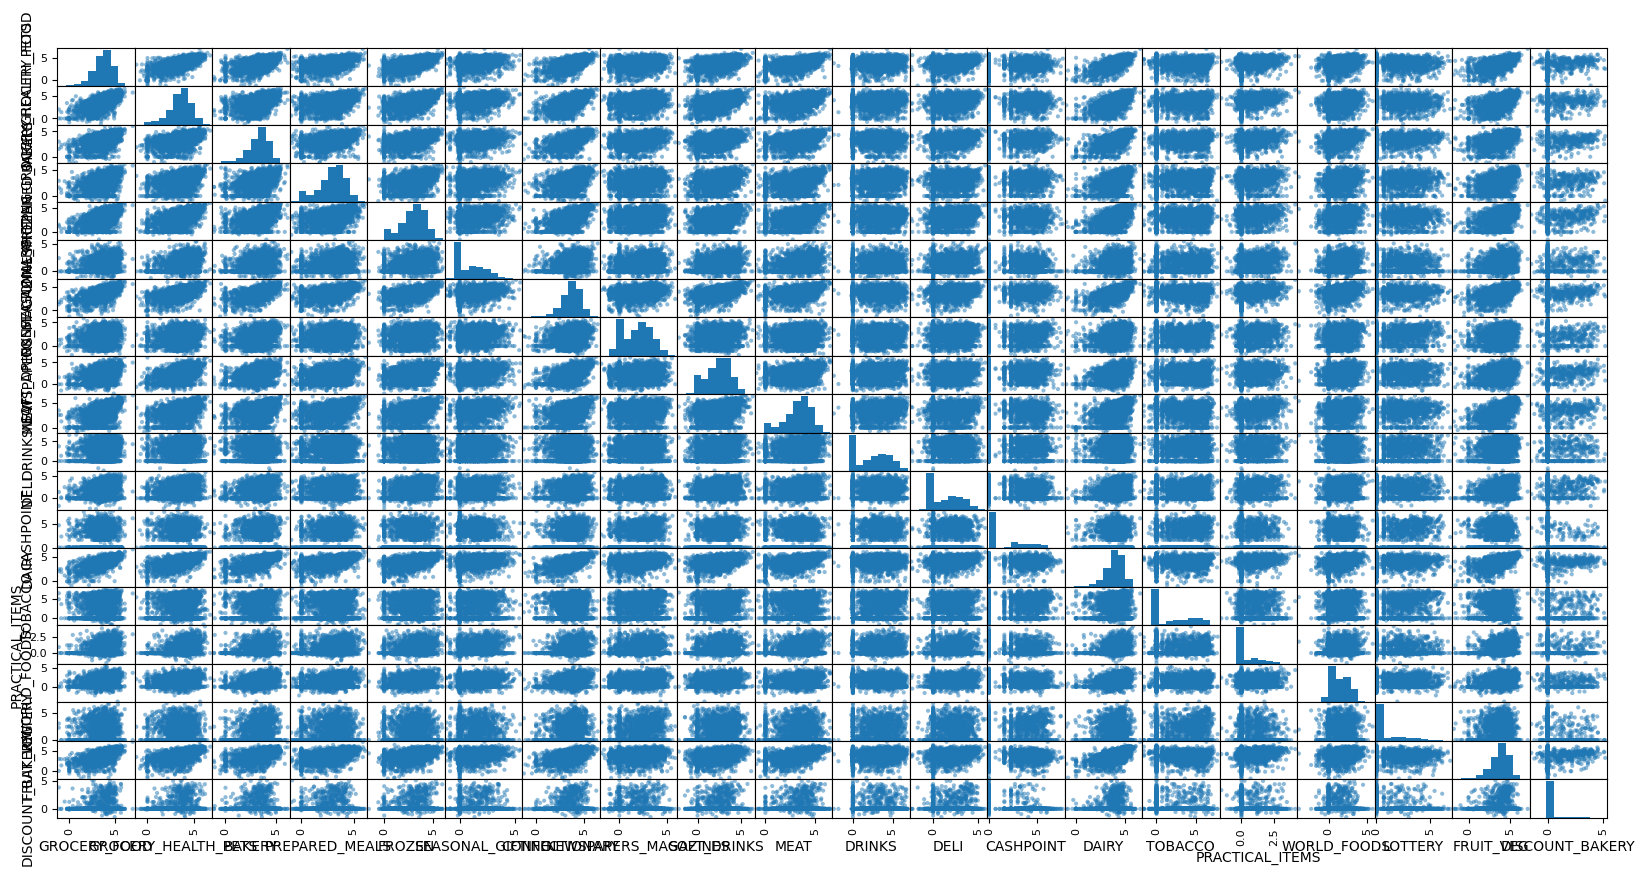

In [60]:
#logged_data = np.log(categorical_spend)
scatter = pandas.plotting.scatter_matrix(logged_data, figsize = (20,10))

In [61]:
logged_data

GROCERY_FOOD  GROCERY_HEALTH_PETS  BAKERY  PREPARED_MEALS  FROZEN  \
0            3.299                3.387   3.280           1.848   3.069   
1            3.509                4.196   2.997           2.492   4.366   
2            3.024                3.612   4.327           4.060   2.676   
3            4.786                4.710   4.716           3.240   2.724   
4            3.368                3.616   3.500           0.000   1.203   
...            ...                  ...     ...             ...     ...   
2995         4.908                4.127   4.116           4.111   4.556   
2996         3.165                2.780   2.863           2.770  -0.010   
2997         3.581                3.775   3.070           0.577   1.061   
2998         2.313                2.527   2.962           0.039   2.103   
2999         3.967                4.491   2.576           3.624   2.939   

      SEASONAL_GIFTING  CONFECTIONARY  NEWSPAPERS_MAGAZINES  SOFT_DRINKS  \
0                2.012          4.680                 4.004        3.128   
1                2.302          3.362                 3.094        0.850   
2                4.668          3.910                 2.287        3.438   
3                0.000          5.168                 2.569        4.824   
4                1.224          4.372                 3.690        1.543   
...                ...            ...                   ...          ...   
2995             0.000          4.493                 0.000        4.036   
2996             0.000          2.908                 1.685       -0.400   
2997             0.000          3.745                 2.616        3.065   
2998             0.683          3.089                 1.558        1.466   
2999             0.000          3.708                 0.344        2.606   

       MEAT  DRINKS   DELI  CASHPOINT  DAIRY  TOBACCO  PRACTICAL_ITEMS  \
0     3.354   3.333  3.336      2.708  3.581    5.088           -0.174   
1     3.275   2.131  0.975      0.000  3.617    0.000            0.000   
2     4.001   0.000  0.956      2.996  4.419    0.000            0.000   
3    -0.051   0.000  0.000      0.000  5.229    4.850            1.504   
4     3.590   0.936  4.597      0.000  4.798    0.000            0.000   
...     ...     ...    ...        ...    ...      ...              ...   
2995  4.074   0.000  0.000      0.000  4.302    3.599            0.928   
2996  0.000   0.000  2.045      0.000  2.895    3.923            0.476   
2997  3.069   2.035  1.411      0.000  4.664    0.000            1.915   
2998  1.539   0.000  2.113      0.000  2.598    0.000            0.000   
2999  4.359   2.834  0.588      5.460  3.855    5.320            0.000   

      WORLD_FOODS  LOTTERY  FRUIT_VEG  DISCOUNT_BAKERY  
0           3.351    0.693      4.168              0.0  
1           1.324    0.000      2.827              0.0  
2           0.000    2.890      4.469              0.0  
3           0.000    1.386      4.431              0.0  
4           0.000    0.000      3.560              0.0  
...           ...      ...        ...              ...  
2995        1.212    0.000      4.167              0.0  
2996        2.276    3.401      1.777              0.0  
2997        0.952    0.000      4.758              0.0  
2998        0.501    0.000      1.303              0.0  
2999        0.000    0.000      4.365              0.0  

[3000 rows x 20 columns]

In [62]:

import sklearn 

from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(logged_data)


PCA(n_components=6)

   GROCERY_FOOD  GROCERY_HEALTH_PETS    BAKERY  PREPARED_MEALS    FROZEN  \
0     -0.245849            -0.286963 -0.233592       -0.282138 -0.282635   
1     -0.136515            -0.099435 -0.057180       -0.093500 -0.134826   
2     -0.059731            -0.051392 -0.134885       -0.028406 -0.083919   
3     -0.041487            -0.045511 -0.000190        0.027426 -0.017059   
4     -0.106938            -0.149334 -0.008606       -0.139651 -0.112592   
5     -0.005335            -0.022812  0.043720        0.067938 -0.005456   

   SEASONAL_GIFTING  CONFECTIONARY  NEWSPAPERS_MAGAZINES  SOFT_DRINKS  \
0         -0.171743      -0.242641             -0.214039    -0.310249   
1         -0.028364      -0.091150              0.079503    -0.023002   
2          0.036132      -0.117034             -0.091747     0.007871   
3         -0.028806      -0.006621              0.036559     0.057714   
4          0.073348      -0.073206              0.382359    -0.079212   
5          0.046070       0.0

<AxesSubplot:>

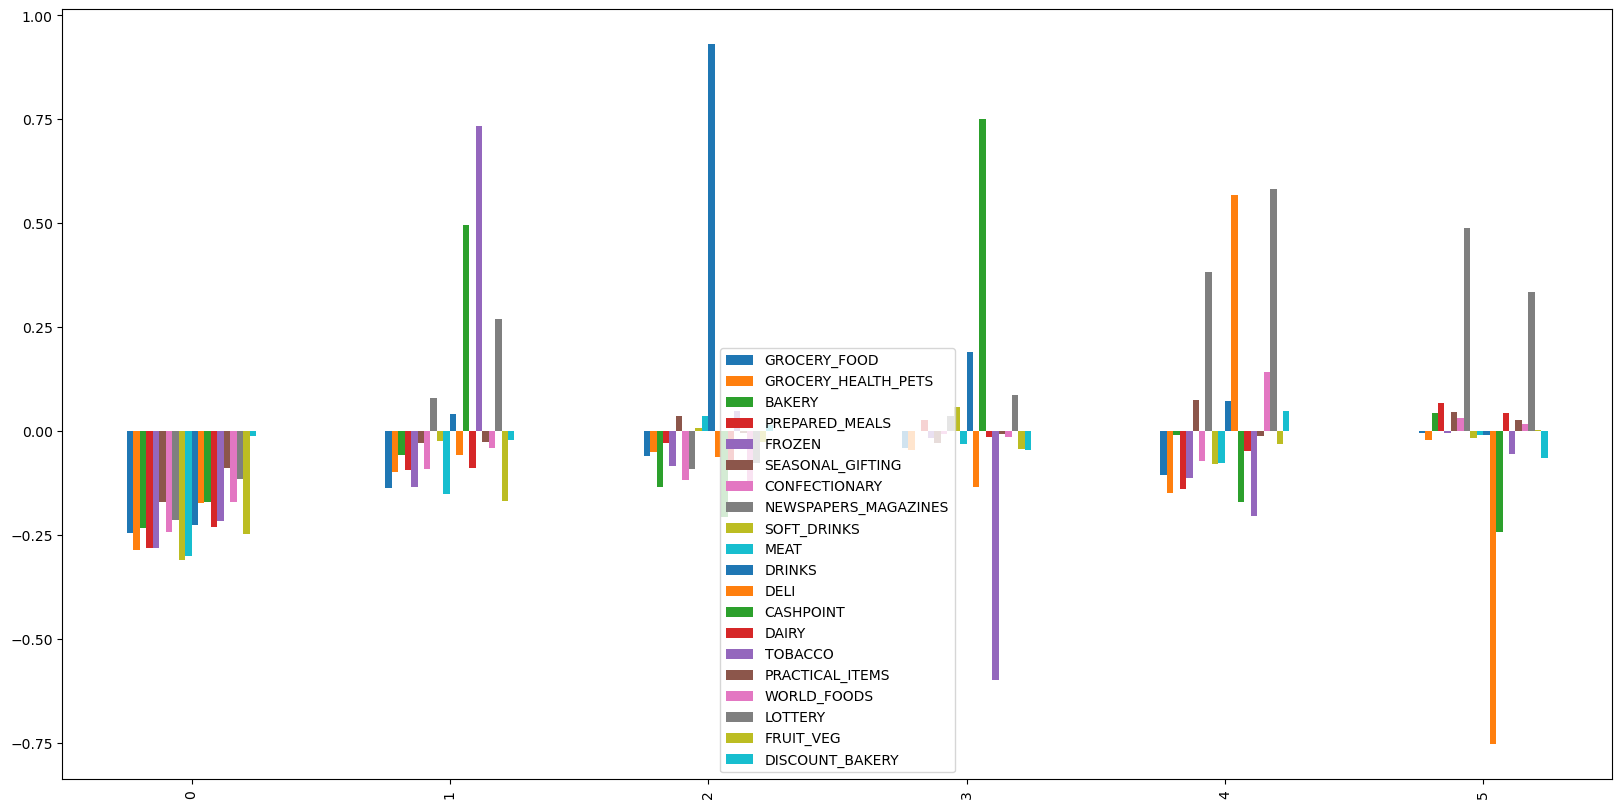

In [63]:

pca_results= pandas.DataFrame(data= pca.fit(logged_data).components_, columns= logged_data.columns) 
print(pca_results)

pca_results.plot.bar(figsize=(20, 10))

In [64]:
print("PCA explained variance: ", pca.explained_variance_ratio_)
print("Cumulative explained variance: ", pca.explained_variance_ratio_.cumsum())

PCA explained variance:  [0.22077048 0.18504337 0.10166357 0.08431934 0.05955137 0.05019311]
Cumulative explained variance:  [0.22077048 0.40581385 0.50747742 0.59179676 0.65134813 0.70154124]


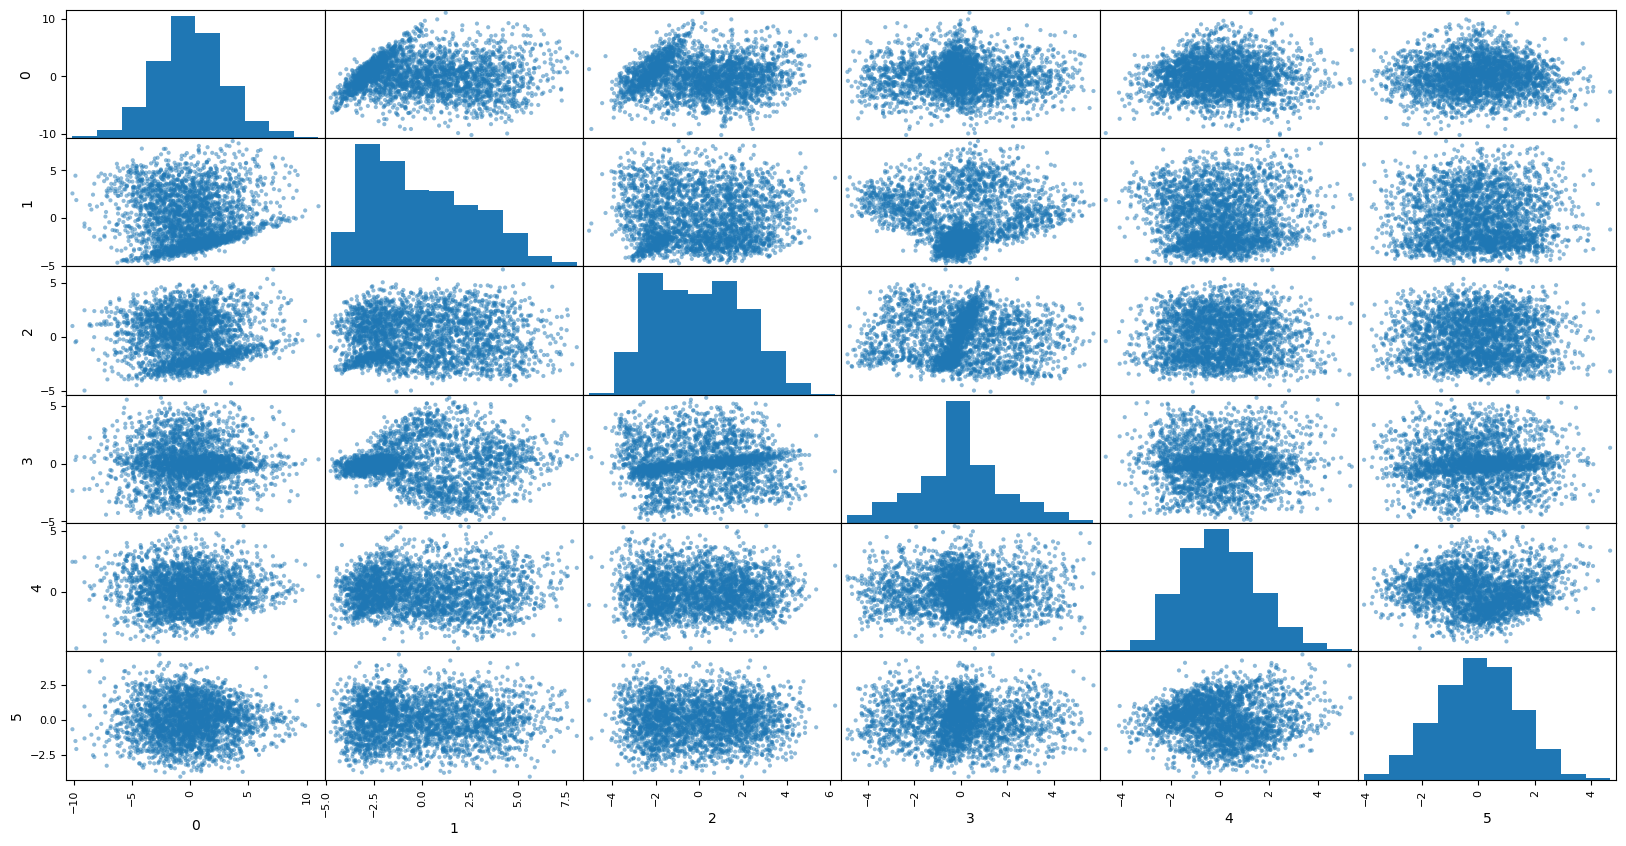

In [65]:
pca = PCA(n_components=6)
pca.fit(logged_data)


reduced_data = pca.transform(logged_data)

reduced_data = pandas.DataFrame(reduced_data)
scatter = pandas.plotting.scatter_matrix(reduced_data, figsize = (20,10))

## Clustering

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 3
clusterer = KMeans(n_clusters=k)
clusterer.fit(reduced_data)


preds = clusterer.predict(reduced_data)
    
#-- Calculate a silhouette score for the 3 segment solution
score = silhouette_score(reduced_data, preds, metric='euclidean')
print("For n_clusters = {}. The average silhouette_score is : {})".format(k, score))


For n_clusters = 3. The average silhouette_score is : 0.20060554801451044)


In [67]:
range_n_clusters = list(range(2, 11))
print(range_n_clusters)

for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters = n_clusters).fit(reduced_data)

    preds = clusterer.predict(reduced_data)

    centers = clusterer.cluster_centers_

    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {})".format(n_clusters, score))
    

[2, 3, 4, 5, 6, 7, 8, 9, 10]
For n_clusters = 2. The average silhouette_score is : 0.22316396409770817)
For n_clusters = 3. The average silhouette_score is : 0.20061379412558442)
For n_clusters = 4. The average silhouette_score is : 0.17222344575087617)
For n_clusters = 5. The average silhouette_score is : 0.1649958407906596)
For n_clusters = 6. The average silhouette_score is : 0.16519473317729458)
For n_clusters = 7. The average silhouette_score is : 0.17330576406735515)
For n_clusters = 8. The average silhouette_score is : 0.1687677514261322)
For n_clusters = 9. The average silhouette_score is : 0.1677819472908)
For n_clusters = 10. The average silhouette_score is : 0.1624361181567256)


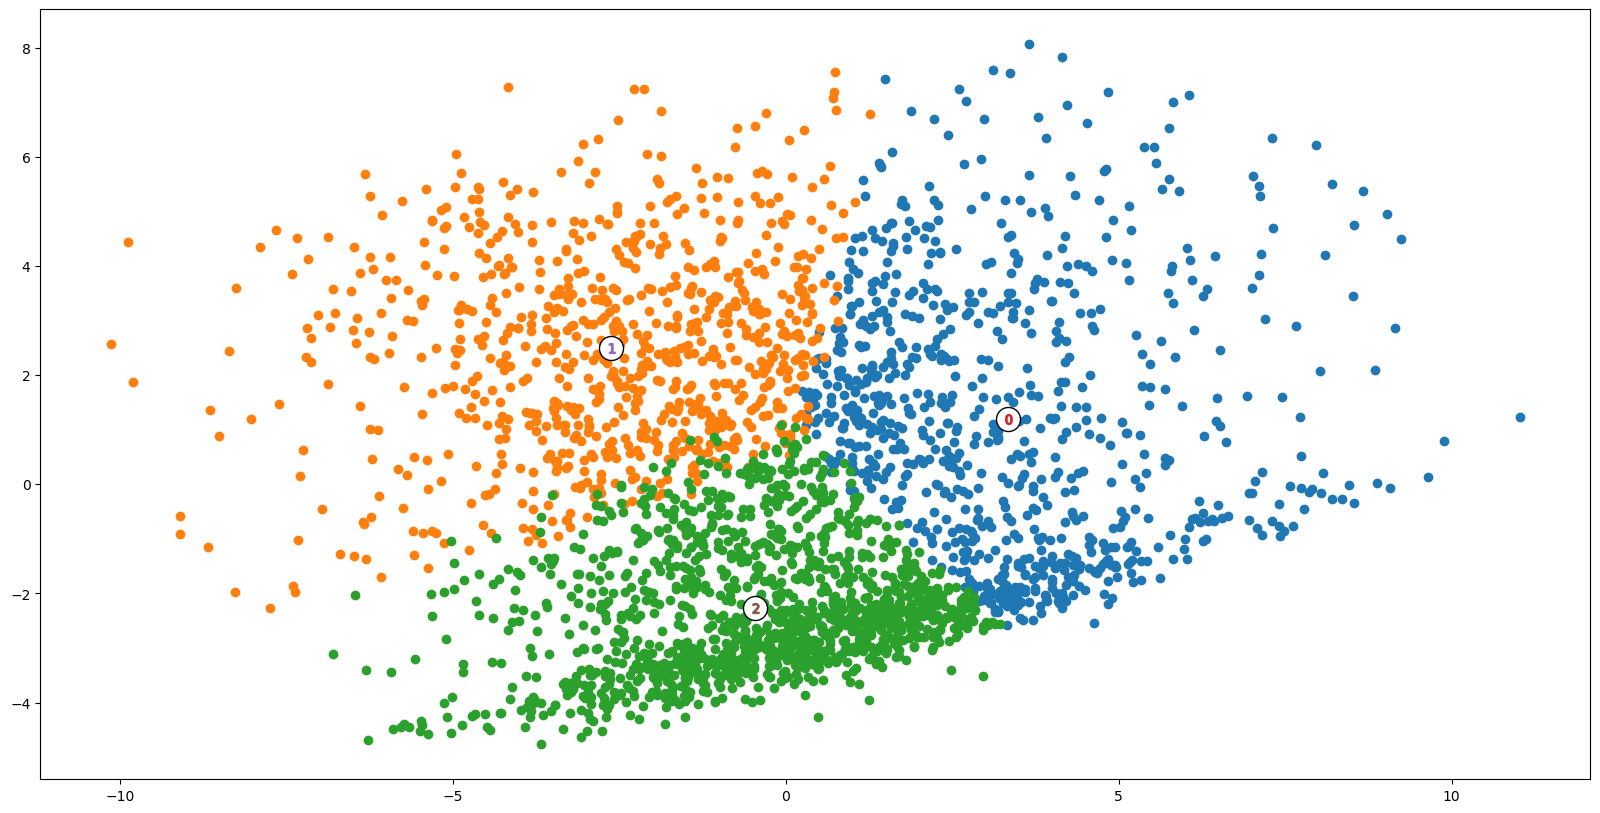

In [68]:

clusterer = KMeans(n_clusters=3).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centres = clusterer.cluster_centers_

assignments = pandas.DataFrame(preds, columns = ['Cluster'])


plot_data = pandas.concat([assignments, reduced_data], axis = 1)

plt.rcParams['figure.figsize'] = (20,10)

for i, c in plot_data.groupby('Cluster'):  
    plt.scatter(c[0], c[1])
    
for i, c in enumerate(centres):
    plt.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    plt.scatter(x = c[0], y = c[1], marker='${}$'.format(i), alpha = 1, s=50);

Reversing the clusters to get the original data to form clusters

In [69]:
# TO DO: Inverse transform the centres
log_centres = pca.inverse_transform(centres)

# TO DO: Exponentiate the centres
true_centres = np.exp(log_centres)

#-- Display the true centres
segments = ['Segment {}'.format(i) for i in range(0, len(centres))]
true_centres = pandas.DataFrame(np.round(true_centres), columns = logged_data.columns)
true_centres.index = segments
print(true_centres)

           GROCERY_FOOD  GROCERY_HEALTH_PETS  BAKERY  PREPARED_MEALS  FROZEN  \
Segment 0          14.0                 11.0    10.0             6.0     6.0   
Segment 1          53.0                 58.0    39.0            31.0    28.0   
Segment 2          57.0                 48.0    32.0            26.0    28.0   

           SEASONAL_GIFTING  CONFECTIONARY  NEWSPAPERS_MAGAZINES  SOFT_DRINKS  \
Segment 0               2.0           15.0                   3.0          3.0   
Segment 1               4.0           56.0                  13.0         21.0   
Segment 2               3.0           51.0                   6.0         12.0   

           MEAT  DRINKS  DELI  CASHPOINT  DAIRY  TOBACCO  PRACTICAL_ITEMS  \
Segment 0   8.0     6.0   2.0        5.0   21.0      9.0              1.0   
Segment 1  41.0    22.0   6.0       19.0   74.0    116.0              2.0   
Segment 2  42.0    12.0   5.0        2.0   68.0      1.0              2.0   

           WORLD_FOODS  LOTTERY  FRUIT_VEG  D

In [70]:
#Cashpoint, Tobacco, Drink, Newspaper magazine, Soft Drinks, || prepared meal and bakery slightly higher than 1, Less fruits

In [71]:
final_assigments = pandas.concat([assignments, categorical_spend], axis = 1)

#-- Create a loop that describes summary statistics for each segment
for c, d in final_assigments.groupby('Cluster'):  
    print("Segment", c+1)
    display(d.describe())

Segment 1


Cluster  customer_number  GROCERY_FOOD  GROCERY_HEALTH_PETS  \
count    831.0       831.000000    831.000000           831.000000   
mean       0.0      9767.161252     23.165138            21.327569   
std        0.0      4978.942941     25.366986            25.697698   
min        0.0        52.000000      0.320000             0.300000   
25%        0.0      5253.500000      8.020000             5.220000   
50%        0.0     11808.000000     15.670000            13.750000   
75%        0.0     14368.000000     29.375000            27.555000   
max        0.0     16306.000000    254.080000           285.570000   

           BAKERY  PREPARED_MEALS      FROZEN  SEASONAL_GIFTING  \
count  831.000000      831.000000  831.000000        831.000000   
mean    17.871853       12.605427   11.415211          3.252443   
std     20.800777       15.472500   14.234293          7.709350   
min      0.320000        0.380000    0.210000          0.300000   
25%      5.630000        2.315000    2.250000          1.000000   
50%     11.990000        7.640000    6.770000          1.000000   
75%     23.715000       17.310000   14.920000          2.550000   
max    335.010000      165.940000  129.830000        137.890000   

       CONFECTIONARY  NEWSPAPERS_MAGAZINES  ...      DRINKS        DELI  \
count     831.000000            831.000000  ...  831.000000  831.000000   
mean       22.741564              8.694513  ...   36.125018    6.187870   
std        23.442451             19.454725  ...   81.767855   11.997514   
min         0.280000              0.300000  ...    0.160000    0.100000   
25%         8.490000              1.000000  ...    1.000000    1.000000   
50%        16.510000              2.970000  ...    4.260000    1.000000   
75%        30.915000              9.250000  ...   29.575000    5.505000   
max       391.780000            351.730000  ...  749.320000  139.490000   

         CASHPOINT       DAIRY      TOBACCO  PRACTICAL_ITEMS  WORLD_FOODS  \
count   831.000000  831.000000   831.000000       831.000000   831.000000   
mean     41.558183   30.303839    80.001625         1.670999     4.251227   
std     120.350658   26.237357   167.669606         2.640596     7.320440   
min       1.000000    0.370000     0.210000         0.500000     0.100000   
25%       1.000000   12.710000     1.000000         1.000000     1.000000   
50%       1.000000   23.740000     7.050000         1.000000     1.290000   
75%      30.000000   39.770000    80.670000         1.000000     4.500000   
max    2137.010000  194.300000  2264.310000        34.080000    88.040000   

          LOTTERY   FRUIT_VEG  DISCOUNT_BAKERY  
count  831.000000  831.000000       831.000000  
mean    12.732371   25.128063         1.918375  
std     45.908040   28.006817         7.261901  
min      1.000000    0.170000         0.300000  
25%      1.000000    7.905000         1.000000  
50%      1.000000   16.390000         1.000000  
75%      5.000000   32.515000         1.000000  
max    946.000000  251.330000       173.060000  

[8 rows x 22 columns]

Segment 2


Cluster  customer_number  GROCERY_FOOD  GROCERY_HEALTH_PETS  \
count    826.0       826.000000    826.000000           826.000000   
mean       1.0      8318.894673     74.617518            86.096150   
std        0.0      3260.983679     68.931913            85.277053   
min        1.0       572.000000      2.150000             1.900000   
25%        1.0      5552.000000     32.887500            32.777500   
50%        1.0      8446.000000     56.250000            61.520000   
75%        1.0     10680.500000     97.225000           106.997500   
max        1.0     16294.000000   1017.070000           884.450000   

           BAKERY  PREPARED_MEALS      FROZEN  SEASONAL_GIFTING  \
count  826.000000      826.000000  826.000000        826.000000   
mean    50.571332       47.175048   46.693196          9.333814   
std     40.349450       47.280523   49.019404         16.766453   
min      1.000000        0.590000    0.850000          0.420000   
25%     24.117500       16.547500   15.765000          1.000000   
50%     40.730000       33.110000   31.075000          4.075000   
75%     65.597500       62.140000   59.420000         10.197500   
max    430.500000      454.290000  369.730000        229.440000   

       CONFECTIONARY  NEWSPAPERS_MAGAZINES  ...      DRINKS        DELI  \
count     826.000000            826.000000  ...  826.000000  826.000000   
mean       76.979782             26.569213  ...  101.117131   18.292252   
std        65.865166             32.403856  ...  164.370797   32.081937   
min         0.760000              0.200000  ...    0.940000    0.300000   
25%        36.592500              5.600000  ...    3.400000    1.000000   
50%        58.465000             15.725000  ...   27.245000    5.985000   
75%        95.330000             34.930000  ...  119.197500   20.720000   
max       614.370000            265.100000  ...  993.050000  316.190000   

         CASHPOINT       DAIRY      TOBACCO  PRACTICAL_ITEMS  WORLD_FOODS  \
count   826.000000  826.000000   826.000000       826.000000   826.000000   
mean    103.615545   91.122518   252.802349         3.046392    11.487203   
std     179.146166   65.527500   283.018193         4.502652    19.153741   
min       1.000000    9.180000     0.840000         0.320000     0.020000   
25%       1.000000   48.337500    48.327500         1.000000     1.965000   
50%      30.000000   75.315000   145.585000         1.000000     6.400000   
75%     135.000000  113.722500   362.222500         3.400000    14.785000   
max    1751.900000  705.460000  2474.390000        65.060000   321.490000   

          LOTTERY    FRUIT_VEG  DISCOUNT_BAKERY  
count  826.000000   826.000000       826.000000  
mean    34.902736    76.912470         2.841380  
std     75.659902    73.787712         9.655441  
min      1.000000     0.890000         0.230000  
25%      1.000000    34.147500         1.000000  
50%      5.000000    61.260000         1.000000  
75%     32.000000    97.622500         1.000000  
max    765.000000  1262.970000       110.690000  

[8 rows x 22 columns]

Segment 3


Cluster  customer_number  GROCERY_FOOD  GROCERY_HEALTH_PETS  \
count   1343.0      1343.000000   1343.000000          1343.000000   
mean       2.0      6924.240506     73.829010            69.948809   
std        0.0      4906.477285     54.329617            67.552126   
min        2.0        14.000000      1.330000             1.000000   
25%        2.0      2258.000000     34.320000            26.555000   
50%        2.0      7063.000000     61.070000            48.730000   
75%        2.0     11319.000000     97.415000            87.795000   
max        2.0     16316.000000    412.780000           538.200000   

            BAKERY  PREPARED_MEALS       FROZEN  SEASONAL_GIFTING  \
count  1343.000000     1343.000000  1343.000000       1343.000000   
mean     43.215383       42.545577    43.553969          6.747200   
std      36.476979       42.577871    41.623889         12.373992   
min       0.650000        0.490000     0.600000          0.300000   
25%      20.485000       14.490000    15.405000          1.000000   
50%      34.310000       31.000000    32.060000          2.510000   
75%      55.275000       56.515000    57.145000          7.320000   
max     444.370000      407.820000   385.800000        209.930000   

       CONFECTIONARY  NEWSPAPERS_MAGAZINES  ...       DRINKS         DELI  \
count    1343.000000           1343.000000  ...  1343.000000  1343.000000   
mean       66.721668             15.817535  ...    55.168228    16.387334   
std        54.062723             23.731868  ...   103.717340    25.566920   
min         1.000000              0.150000  ...     0.090000     0.090000   
25%        31.225000              1.575000  ...     1.000000     1.000000   
50%        51.990000              7.450000  ...    13.890000     5.100000   
75%        85.585000             19.050000  ...    63.350000    20.805000   
max       529.590000            199.020000  ...  1005.330000   189.270000   

         CASHPOINT        DAIRY      TOBACCO  PRACTICAL_ITEMS  WORLD_FOODS  \
count  1343.000000  1343.000000  1343.000000      1343.000000  1343.000000   
mean     13.141817    84.470052     2.769933         2.943961     9.853753   
std      46.761447    54.601273     6.442608         4.392513    14.229068   
min       1.000000     1.000000     0.200000         0.210000     0.240000   
25%       1.000000    45.785000     1.000000         1.000000     1.475000   
50%       1.000000    71.550000     1.000000         1.000000     4.940000   
75%       1.000000   108.305000     1.000000         2.970000    12.610000   
max     927.750000   335.810000    84.310000        47.540000   172.620000   

           LOTTERY    FRUIT_VEG  DISCOUNT_BAKERY  
count  1343.000000  1343.000000      1343.000000  
mean      7.415488    92.300663         3.101526  
std      35.930625    74.147653        10.101030  
min       1.000000     1.000000         0.400000  
25%       1.000000    41.605000         1.000000  
50%       1.000000    74.360000         1.000000  
75%       1.000000   117.845000         1.000000  
max     756.000000   601.910000       158.440000  

[8 rows x 22 columns]

In [72]:
final_assigments

Cluster  customer_number  GROCERY_FOOD  GROCERY_HEALTH_PETS  BAKERY  \
0           1            11387         27.08                29.59   26.58   
1           2             8171         33.43                66.40   20.02   
2           2             1060         20.57                37.04   75.72   
3           1             3728        119.84               111.08  111.67   
4           2            14621         29.03                37.17   33.13   
...       ...              ...           ...                  ...     ...   
2995        2            12541        135.31                61.99   61.31   
2996        0            16081         23.69                16.12   17.51   
2997        2             7094         35.92                43.59   21.55   
2998        0             3457         10.10                12.51   19.34   
2999        1             6647         52.82                89.21   13.14   

      PREPARED_MEALS  FROZEN  SEASONAL_GIFTING  CONFECTIONARY  \
0               6.35   21.51              7.48         107.78   
1              12.09   78.74              9.99          28.84   
2              57.98   14.53            106.46          49.88   
3              25.54   15.24              1.00         175.50   
4               1.00    3.33              3.40          79.23   
...              ...     ...               ...            ...   
2995           61.02   95.22              1.00          89.36   
2996           15.96    0.99              1.00          18.32   
2997            1.78    2.89              1.00          42.31   
2998            1.04    8.19              1.98          21.96   
2999           37.50   18.89              1.00          40.78   

      NEWSPAPERS_MAGAZINES  ...  DRINKS   DELI  CASHPOINT   DAIRY  TOBACCO  \
0                    54.83  ...   28.02  28.12       15.0   35.91   162.10   
1                    22.06  ...    8.42   2.65        1.0   37.24     1.00   
2                     9.85  ...    1.00   2.60       20.0   82.98     1.00   
3                    13.05  ...    1.00   1.00        1.0  186.56   127.70   
4                    40.06  ...    2.55  99.16        1.0  121.31     1.00   
...                    ...  ...     ...    ...        ...     ...      ...   
2995                  1.00  ...    1.00   1.00        1.0   73.84    36.57   
2996                  5.39  ...    1.00   7.73        1.0   18.08    50.54   
2997                 13.68  ...    7.65   4.10        1.0  106.08     1.00   
2998                  4.75  ...    1.00   8.27        1.0   13.44     1.00   
2999                  1.41  ...   17.01   1.80      235.0   47.23   204.41   

      PRACTICAL_ITEMS  WORLD_FOODS  LOTTERY  FRUIT_VEG  DISCOUNT_BAKERY  
0                0.84        28.54      2.0      64.58              1.0  
1                1.00         3.76      1.0      16.89              1.0  
2                1.00         1.00     18.0      87.30              1.0  
3                4.50         1.00      4.0      84.05              1.0  
4                1.00         1.00      1.0      35.16              1.0  
...               ...          ...      ...        ...              ...  
2995             2.53         3.36      1.0      64.52              1.0  
2996             1.61         9.74     30.0       5.91              1.0  
2997             6.79         2.59      1.0     116.54              1.0  
2998             1.00         1.65      1.0       3.68              1.0  
2999             1.00         1.00      1.0      78.65              1.0  

[3000 rows x 22 columns]

In [73]:
final_table=rfmTable[['priority']].merge(final_assigments[['customer_number','Cluster']], left_on='customer_number', right_on='customer_number')

In [74]:
final_table.loc[(final_table['priority'] == 'Platinum') & (final_table['Cluster'] == 1)]

customer_number  priority  Cluster
130               667  Platinum        1
154               792  Platinum        1
289              1480  Platinum        1
355              1891  Platinum        1
398              2132  Platinum        1
...               ...       ...      ...
2945            15972  Platinum        1
2951            16022  Platinum        1
2958            16043  Platinum        1
2975            16165  Platinum        1
2983            16203  Platinum        1

[495 rows x 3 columns]

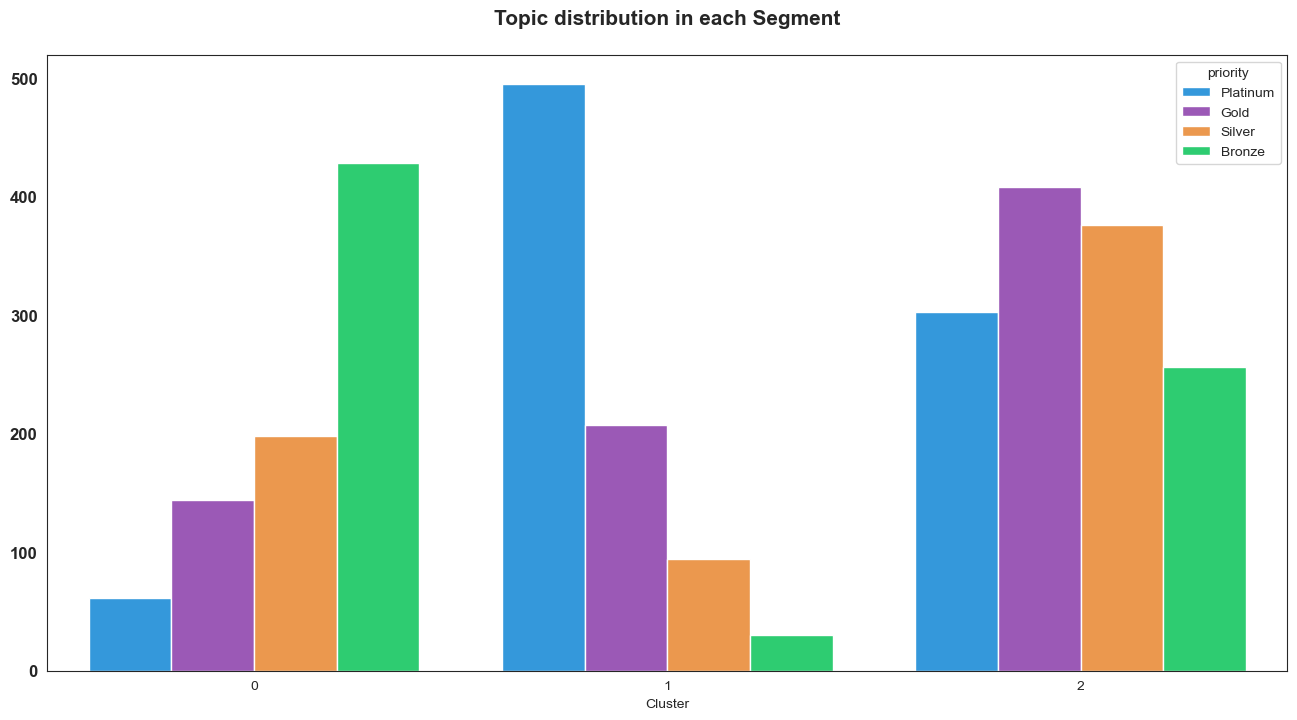

In [75]:
sns.set_style ('white')
plt.figure (figsize = (16, 8))
colors = ['#3498DB', '#9B59B6', '#EB984E', '#2ECC71']
sns.countplot (data = final_table, x = 'Cluster', hue = 'priority', palette = colors, saturation = 1)
plt.title ('Topic distribution in each Segment\n', fontsize = 15, fontweight = 'bold')
#plt.xlabel ('Essential spender', 'Free Spender', 'Traveller')
plt.ylabel ('')
plt.yticks (fontsize = 12, fontweight = 'bold')
plt.show ()

In [77]:

final_table['Cluster'] = final_table['Cluster'].replace(0,'Traveller')
final_table['Cluster'] = final_table['Cluster'].replace(1,'Free')
final_table['Cluster'] = final_table['Cluster'].replace(2,'Essential')
final_table['priority'] = final_table['priority'].replace('Silver','Gold_Silver')
final_table['priority'] = final_table['priority'].replace('Gold','Gold_Silver')
final_table["Archetype"] = final_table["priority"].astype('str') +  '_' + final_table["Cluster"].astype('str')
final_table


customer_number     priority    Cluster              Archetype
0                  14  Gold_Silver  Essential  Gold_Silver_Essential
1                  45  Gold_Silver  Essential  Gold_Silver_Essential
2                  52  Gold_Silver  Traveller  Gold_Silver_Traveller
3                  61  Gold_Silver  Essential  Gold_Silver_Essential
4                  63       Bronze  Traveller       Bronze_Traveller
...               ...          ...        ...                    ...
2995            16295  Gold_Silver  Traveller  Gold_Silver_Traveller
2996            16301       Bronze  Traveller       Bronze_Traveller
2997            16303       Bronze  Traveller       Bronze_Traveller
2998            16306       Bronze  Traveller       Bronze_Traveller
2999            16316  Gold_Silver  Essential  Gold_Silver_Essential

[3000 rows x 4 columns]

In [78]:

final_table=final_table.drop(['priority','Cluster'] , axis=1)
final_table['Archetype'] = final_table['Archetype'].replace('Platinum_Traveller','Gold_Silver_Free')
final_table['Archetype'] = final_table['Archetype'].replace('Bronze_Free','Gold_Silver_Free')


In [81]:
final_table['Archetype'].unique()

array(['Gold_Silver_Essential', 'Gold_Silver_Traveller',
       'Bronze_Traveller', 'Bronze_Essential', 'Platinum_Essential',
       'Gold_Silver_Free', 'Platinum_Free'], dtype=object)

In [ ]:
#the platinum traveller has less number of customers should can be combined with silver free category due to similarity
#Similarly for Bronze free very less customers

In [82]:
final_table.to_csv('out.csv', index=False) 

In [93]:
fin_df=final_table['Archetype'].value_counts()

<AxesSubplot:ylabel='Archetype'>

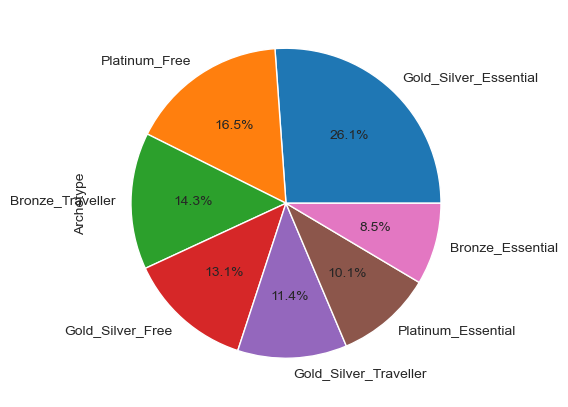

In [101]:
final_table['Archetype'].value_counts().plot(kind='pie', figsize=(5, 10), autopct='%1.1f%%')